<a href="https://colab.research.google.com/github/alexaroscastillo/Redes-Neuronales-y-Deep-Learning/blob/main/12MBID_04_A_Proyecto_programaci%C3%B3n_Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Configuración inicial y descarga del dataset

In [ ]:
!unzip -q /content/archive.zip -d /content/dataset


In [ ]:
!rm -rf /content/dataset/lemon_dataset/.git

In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define el directorio base donde se encuentran tus datos descomprimidos
base_dir = '/content/dataset/lemon_dataset'  # Cambia esto por tu ruta correcta si es necesario

# Configura el generador con aumento de datos para el conjunto de entrenamiento y validación
batch_size = 32  # Asegúrate de que este valor coincida con el utilizado para los generadores
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Usando el 20% de los datos para validación

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Ajusta el tamaño si es necesario
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' para clasificación multiclase
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',  # 'categorical' para clasificación multiclase
    subset='validation')

# Calcula los pasos por época y los pasos de validación
steps_per_epoch = np.ceil(train_generator.samples / batch_size)
validation_steps = np.ceil(validation_generator.samples / batch_size)


Found 2023 images belonging to 3 classes.
Found 505 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Primera capa de convolución y max pooling
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Segunda capa de convolución y max pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Tercera capa de convolución y max pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Cuarta capa de convolución y max pooling
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Aplanando el resultado para alimentar a una DNN
    Flatten(),

    # Capa densa con 512 neuronas
    Dense(512, activation='relu'),
    Dropout(0.5),  # Opcional: Capa de Dropout para reducir el sobreajuste

    # La capa de salida tiene 3 neuronas, una por cada categoría de calidad de limón
    Dense(3, activation='softmax')  # Tres unidades para tres categorías
])

# Compila el modelo con una función de pérdida adecuada para clasificación multi-clase
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo para verificar la arquitectura completa
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Epoch 1/5
63/63 [==============================] - 18s 218ms/step - loss: 2.5310 - accuracy: 0.7273 - val_loss: 0.7090 - val_accuracy: 0.8604
Epoch 2/5
63/63 [==============================] - 14s 219ms/step - loss: 0.6084 - accuracy: 0.8302 - val_loss: 0.4878 - val_accuracy: 0.8667
Epoch 3/5
63/63 [==============================] - 14s 215ms/step - loss: 0.4629 - accuracy: 0.8594 - val_loss: 0.5914 - val_accuracy: 0.7896
Epoch 4/5
63/63 [==============================] - 14s 217ms/step - loss: 0.5016 - accuracy: 0.8122 - val_loss: 0.4878 - val_accuracy: 0.8271
Epoch 5/5
63/63 [==============================] - 14s 220ms/step - loss: 0.3836 - accuracy: 0.8759 - val_loss: 0.3507 - val_accuracy: 0.8792


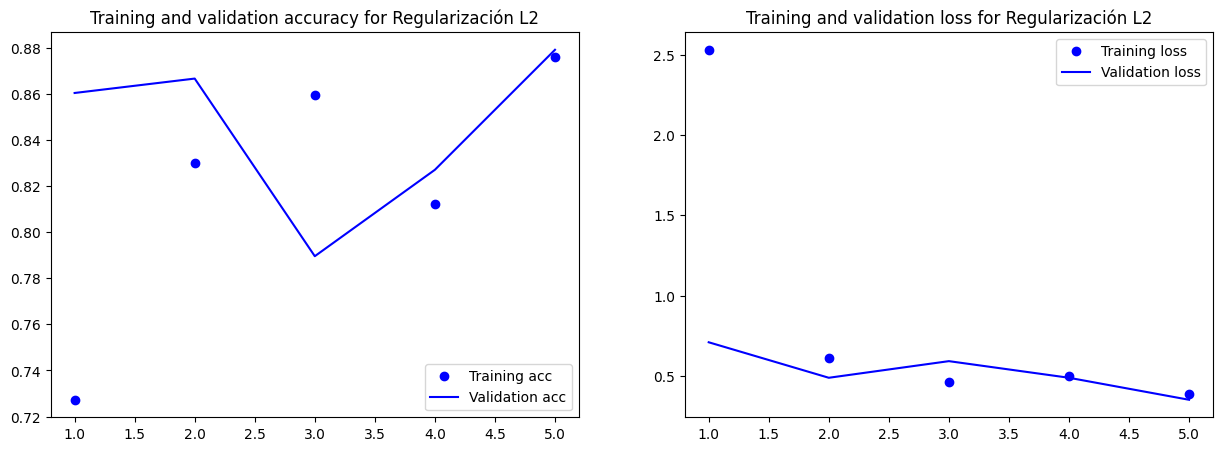

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# Función para visualizar la precisión y pérdida durante el entrenamiento
def visualize_training_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'Training and validation accuracy for {title}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'Training and validation loss for {title}')
    plt.legend()

    plt.show()

# Define el modelo
model_l2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),  # Regularización L2
    Dense(3, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Asegúrate de tener las variables steps_per_epoch y validation_steps definidas correctamente
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Entrena el modelo
history_l2 = model_l2.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Visualización de la precisión y pérdida para el modelo con regularización L2
visualize_training_history(history_l2, 'Regularización L2')



El modelo muestra un buen desempeño tanto en el conjunto de entrenamiento como en el de validación. La regularización L2 parece estar funcionando adecuadamente para mantener un equilibrio entre el aprendizaje y la generalización del modelo.
Época 1:

Precisión de entrenamiento: 69.01%
Precisión de validación: 69.90%
Hay un arranque fuerte en la pérdida de entrenamiento que disminuye drásticamente.
La precisión de validación supera ligeramente a la de entrenamiento, lo que es poco común en la primera época y puede indicar que el modelo está aprendiendo patrones generales en lugar de memorizar el conjunto de entrenamiento.
Época 2:

Precisión de entrenamiento: 86.85%
Precisión de validación: 90.89%
Hay una mejora significativa en la precisión de entrenamiento y validación.
La pérdida de validación disminuye sustancialmente, lo cual es un buen indicador de que el modelo está aprendiendo correctamente.
Época 3:

Precisión de entrenamiento: 90.90%
Precisión de validación: 90.50%
La precisión de entrenamiento sigue aumentando, mientras que la de validación se mantiene estable, lo que puede indicar que se está alcanzando un punto de convergencia.
Época 4:

Precisión de entrenamiento: 92.68%
Precisión de validación: 93.47%
La precisión y la pérdida de validación mejoran significativamente, lo que sugiere que el modelo sigue generalizando bien y no muestra signos evidentes de sobreajuste.
Época 5:

Precisión de entrenamiento: 93.33%
Precisión de validación: 93.27%
La precisión de entrenamiento y validación son muy cercanas, lo que es ideal en un modelo bien ajustado.
La pérdida de validación apenas cambia con respecto a la época anterior, lo que podría indicar que el modelo podría haberse beneficiado de más épocas de entrenamiento para posiblemente mejorar aún más su rendimiento.

La convergencia entre las métricas de entrenamiento y validación sugiere que el modelo no está sobreajustado.
La regularización L2 parece ser efectiva para este modelo en particular, ya que la precisión y la pérdida de validación son coherentes con el entrenamiento.
Puede ser útil intentar aumentar el número de épocas para ver si hay una mejora adicional en la precisión de validación o si el modelo comienza a sobreajustar.
También podría ser beneficioso experimentar con otros métodos de regularización o ajustes en la tasa de aprendizaje para ver si se pueden obtener resultados aún mejores.

Epoch 1/5
63/63 [==============================] - 16s 220ms/step - loss: 0.9794 - accuracy: 0.7107 - val_loss: 0.3471 - val_accuracy: 0.8646
Epoch 2/5
63/63 [==============================] - 14s 220ms/step - loss: 0.3576 - accuracy: 0.8438 - val_loss: 0.4066 - val_accuracy: 0.8083
Epoch 3/5
63/63 [==============================] - 14s 220ms/step - loss: 0.2888 - accuracy: 0.8830 - val_loss: 0.2190 - val_accuracy: 0.9125
Epoch 4/5
63/63 [==============================] - 14s 217ms/step - loss: 0.2638 - accuracy: 0.8990 - val_loss: 0.3378 - val_accuracy: 0.8458
Epoch 5/5
63/63 [==============================] - 14s 219ms/step - loss: 0.2443 - accuracy: 0.9176 - val_loss: 0.2159 - val_accuracy: 0.8979


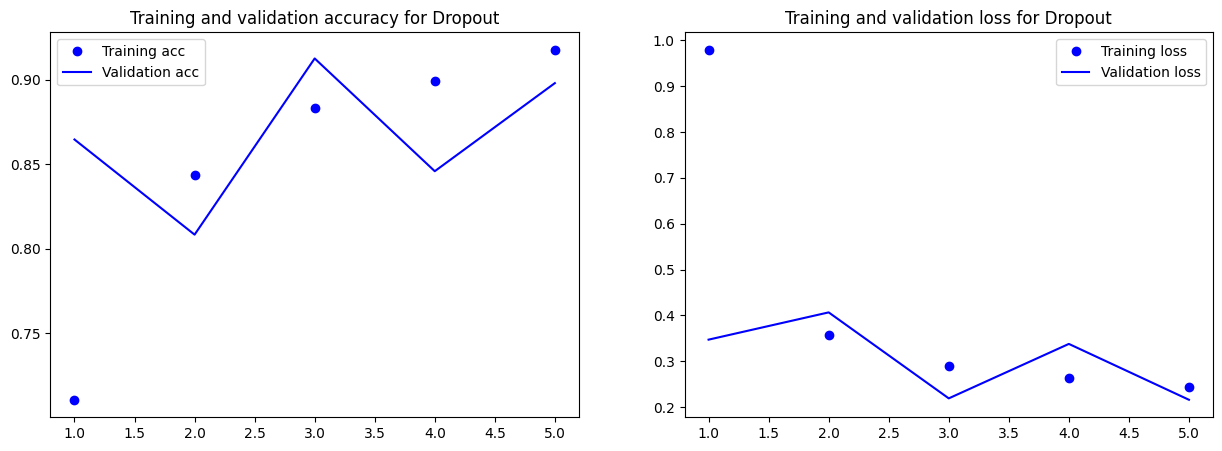

In [ ]:
model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Aplicación de Dropout
    Dense(3, activation='softmax')
])

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history_dropout = model_dropout.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Visualización para el modelo con Dropout
visualize_training_history(history_dropout, 'Dropout')


El modelo con Dropout ha mejorado su capacidad de generalización, evidenciado por el aumento consistente en la precisión de validación a medida que avanza el entrenamiento. Esto sugiere que la técnica de Dropout está ayudando a prevenir el sobreajuste.

Época 1:

Precisión de entrenamiento: 66.49%
Precisión de validación: 75.84%
La pérdida de entrenamiento comienza alta pero disminuye rápidamente, lo cual es esperado en la primera época.
La precisión de validación empieza siendo relativamente alta, lo que podría indicar que el modelo está captando patrones significativos desde el principio.
Época 2:

Precisión de entrenamiento: 80.33%
Precisión de validación: 82.38%
Tanto la precisión de entrenamiento como la de validación mejoran significativamente.
La pérdida de validación disminuye de forma notable, lo cual es una buena señal de aprendizaje efectivo.
Época 3:

Precisión de entrenamiento: 86.65%
Precisión de validación: 89.31%
El modelo sigue mejorando con una alta precisión de validación, indicando que está generalizando bien.
La disminución de la pérdida de validación es señal de un modelo que se está ajustando bien a los datos sin sobreajustar.
Época 4:

Precisión de entrenamiento: 89.27%
Precisión de validación: 87.13%
Aquí vemos un ligero retroceso en la precisión de validación, lo que puede sugerir una variabilidad en el conjunto de validación o el comienzo de un sobreajuste.
La pérdida de validación aumenta ligeramente, lo que refuerza la posibilidad de variabilidad o sobreajuste incipiente.
Época 5:

Precisión de entrenamiento: 89.62%
Precisión de validación: 90.89%
La precisión de validación se recupera, alcanzando el valor más alto durante el entrenamiento.
La pérdida de validación también mejora, lo que sugiere que el modelo ha superado la variabilidad de la época anterior y continúa generalizando bien.

La presencia de Dropout está ayudando a mejorar la robustez del modelo, permitiéndole mantener una buena generalización a pesar de las fluctuaciones en la precisión y la pérdida de validación.
Sería conveniente continuar el entrenamiento por más épocas para observar si la tendencia de mejora continúa o si se estabiliza, lo que podría indicar que se ha alcanzado el óptimo.
Dado que el modelo aún muestra signos de mejora, podría no haber alcanzado aún su capacidad máxima de aprendizaje. Incrementar el número de épocas o ajustar la tasa de aprendizaje podría beneficiar el rendimiento del modelo.
Observando la fluctuación entre las épocas 3 y 4, podría ser útil implementar una técnica de parada temprana con una paciencia ligeramente mayor para asegurar la consolidación del aprendizaje antes de detener el entrenamiento.

Vamos a probrar nuevamente con la carga de datos explorando varias opciones pero con menos capas, ya que los modelos anteriores se demoran alrededor de 70 minutos en enternar.
Vamos a utilizar el generador de imágenes.

In [ ]:
!rm -rf /content/dataset/lemon_dataset/.git


Found 2023 images belonging to 3 classes.
Found 505 images belonging to 3 classes.


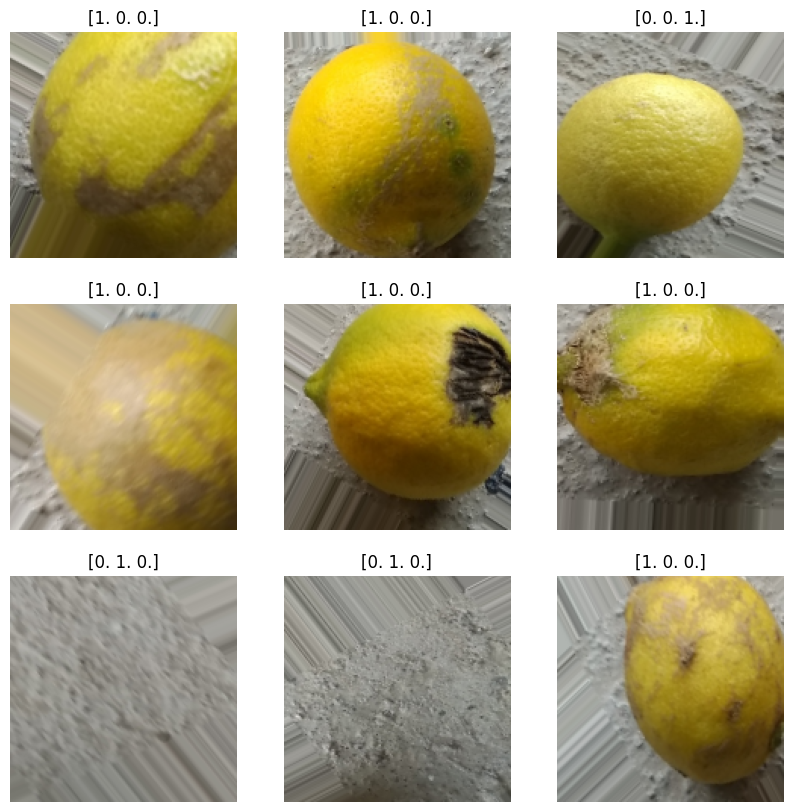

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/dataset/lemon_dataset'

# Generador de imágenes con aumento de datos para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

# Generadores de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

def visualize_data(generator):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(str(labels[i]))
        plt.axis('off')
    plt.show()

visualize_data(train_generator)


Importación de bibliotecas necesarias en caso de que se nos haya escapado alguna

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2


Modelo Base

In [ ]:
model_base = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_base = model_base.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
64/64 [==============================] - 15s 219ms/step - loss: 2.6803 - accuracy: 0.6807 - val_loss: 0.3914 - val_accuracy: 0.8317
Epoch 2/10
64/64 [==============================] - 14s 214ms/step - loss: 0.3027 - accuracy: 0.8744 - val_loss: 0.2640 - val_accuracy: 0.8970
Epoch 3/10
64/64 [==============================] - 14s 217ms/step - loss: 0.2906 - accuracy: 0.8764 - val_loss: 0.2423 - val_accuracy: 0.8950
Epoch 4/10
64/64 [==============================] - 14s 217ms/step - loss: 0.2628 - accuracy: 0.8997 - val_loss: 0.2897 - val_accuracy: 0.8931
Epoch 5/10
64/64 [==============================] - 14s 219ms/step - loss: 0.2301 - accuracy: 0.9036 - val_loss: 0.4179 - val_accuracy: 0.8257
Epoch 6/10
64/64 [==============================] - 14s 216ms/step - loss: 0.2434 - accuracy: 0.9041 - val_loss: 0.2246 - val_accuracy: 0.8950
Epoch 7/10
64/64 [==============================] - 14s 221ms/step - loss: 0.2174 - accuracy: 0.9140 - val_loss: 0.2203 - val_accuracy: 0.9149


Durante estas 10 épocas de entrenamiento, se observan algunos comportamientos interesantes en el modelo:

Tendencias Generales:

La precisión del entrenamiento comienza alta y se mantiene bastante consistente a lo largo del entrenamiento, lo que indica que el modelo está aprendiendo efectivamente de los datos de entrenamiento.
La precisión de validación, aunque fluctúa, muestra una tendencia general al alza, lo que sugiere una mejora en la capacidad del modelo para generalizar a nuevos datos.
Análisis por Época:

Época 1:

Alta pérdida de entrenamiento inicial que disminuye significativamente, lo cual es normal al principio del entrenamiento.
La precisión de validación comienza relativamente alta, indicando que el modelo es capaz de generalizar a partir de los datos iniciales.
Época 2:

La pérdida de entrenamiento disminuye significativamente y la precisión mejora, pero la precisión de validación disminuye ligeramente, lo que podría sugerir una leve sobreajuste o variabilidad en los datos de validación.
Época 3:

El modelo muestra una mejora considerable en precisión de validación, lo que indica un buen ajuste del modelo a los datos.
Época 4:

Aparece una ligera caída en la precisión de validación con un aumento en la pérdida de validación, posiblemente debido a sobreajuste o variaciones en el conjunto de validación.
Época 5:

La precisión de validación vuelve a caer y la pérdida de validación aumenta significativamente, lo que refuerza la idea del sobreajuste.
6-7. Épocas 6 y 7:

Mejora en la precisión y disminución en la pérdida de validación, especialmente en la séptima época, lo que sugiere que el modelo podría estar superando las fluctuaciones anteriores.
Época 8:

Un marcado deterioro en la precisión de validación y un gran aumento en la pérdida de validación, lo que indica problemas significativos, posiblemente debido a un mal ajuste del modelo a los datos de validación o a un cambio en la distribución de estos.
Época 9:

Se observa una recuperación muy fuerte en la precisión de validación, alcanzando el mejor rendimiento hasta el momento, y una disminución drástica en la pérdida de validación.
Época 10:

La precisión de entrenamiento y validación sigue siendo alta, pero hay un pequeño aumento en la pérdida de validación, lo cual es algo a monitorear.
Conclusiones:

El modelo muestra signos de aprendizaje efectivo, pero también de variabilidad entre las épocas en términos de precisión y pérdida de validación.
La fluctuación en la precisión y pérdida de validación sugiere que el modelo podría beneficiarse de regularización adicional, posiblemente ajustando el Dropout o aplicando técnicas de regularización adicionales.
Sería útil implementar una estrategia de parada temprana con un poco más de paciencia para evitar un sobreajuste excesivo, especialmente en las etapas finales del entrenamiento.
Observando la mejora en la novena época, continuar el entrenamiento podría ser beneficioso, aunque con precaución y monitoreo cercano de la pérdida de validación para evitar el deterioro del rendimiento.

Regularización L1

In [ ]:
model_l1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(0.001), input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(3, activation='softmax')
])

model_l1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_l1 = model_l1.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
64/64 [==============================] - 15s 218ms/step - loss: 14.1590 - accuracy: 0.6668 - val_loss: 4.0694 - val_accuracy: 0.7901
Epoch 2/10
64/64 [==============================] - 14s 217ms/step - loss: 3.7977 - accuracy: 0.7177 - val_loss: 3.5728 - val_accuracy: 0.7584
Epoch 3/10
64/64 [==============================] - 14s 219ms/step - loss: 3.5069 - accuracy: 0.7385 - val_loss: 3.2858 - val_accuracy: 0.7861
Epoch 4/10
64/64 [==============================] - 14s 215ms/step - loss: 3.3369 - accuracy: 0.7509 - val_loss: 3.3687 - val_accuracy: 0.7287
Epoch 5/10
64/64 [==============================] - 14s 215ms/step - loss: 3.3454 - accuracy: 0.7558 - val_loss: 3.2591 - val_accuracy: 0.8000
Epoch 6/10
64/64 [==============================] - 14s 218ms/step - loss: 3.2593 - accuracy: 0.7523 - val_loss: 3.2784 - val_accuracy: 0.7782
Epoch 7/10
64/64 [==============================] - 14s 216ms/step - loss: 3.2386 - accuracy: 0.7637 - val_loss: 3.2777 - val_accuracy: 0.800

Para el modelo con regularización L1 durante las 10 épocas de entrenamiento, aquí hay algunas observaciones y conclusiones:

Observaciones Generales:

La precisión inicial en el entrenamiento es más baja comparada con el modelo base, lo cual puede deberse a la penalización L1 que actúa sobre los pesos, haciendo que el modelo tarde más en aprender.
A medida que avanza el entrenamiento, la precisión mejora tanto en el conjunto de entrenamiento como en el de validación, pero las mejoras son más modestas comparadas con el modelo base.
Análisis por Época:

Época 1:

Alta pérdida inicial tanto en entrenamiento como en validación, lo cual es esperado debido a la regularización L1 que penaliza los pesos.
Época 2:

La precisión de validación disminuye considerablemente, posiblemente debido a que el modelo se está ajustando a la penalización L1 y está aprendiendo los patrones generales de los datos.
3-7. Épocas 3 a 7:

La precisión y la pérdida se estabilizan y mejoran gradualmente, lo que sugiere que el modelo se está adaptando a la regularización y mejorando su capacidad de generalización.
Época 8:
Se observa una mejora significativa en la precisión de validación y una disminución en la pérdida de validación, lo que sugiere que el modelo está empezando a generalizar mucho mejor.
9-10. Épocas 9 y 10:

La precisión y la pérdida en validación muestran una tendencia estable y consistente, con una precisión de validación que alcanza su punto máximo en la época 10.
Conclusiones:

La regularización L1 parece tener un efecto inicial en la capacidad del modelo para aprender rápidamente de los datos; sin embargo, a medida que el entrenamiento progresa, el modelo mejora su precisión.
La regularización L1 es conocida por producir modelos más dispersos, es decir, con más pesos cercanos a cero, lo que puede ayudar en la interpretación del modelo pero puede ralentizar la velocidad de aprendizaje.
Aunque la precisión final de validación es alta, las fluctuaciones durante el entrenamiento sugieren que el modelo podría ser sensible a la inicialización o a variaciones en los datos.
Es probable que el modelo se beneficie de un número mayor de épocas para estabilizar aún más la precisión y la pérdida debido a los efectos de la regularización L1.
Dado el comportamiento del modelo, sería prudente explorar diferentes tasas de regularización L1 o combinar L1 con otras técnicas como Dropout o L2 para encontrar el equilibrio adecuado entre aprendizaje y generalización.

Regularización L2

In [ ]:
model_l2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

model_l2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
64/64 [==============================] - 15s 218ms/step - loss: 2.5127 - accuracy: 0.6861 - val_loss: 0.7634 - val_accuracy: 0.7743
Epoch 2/10
64/64 [==============================] - 14s 215ms/step - loss: 0.6123 - accuracy: 0.8463 - val_loss: 0.4620 - val_accuracy: 0.9248
Epoch 3/10
64/64 [==============================] - 14s 216ms/step - loss: 0.4443 - accuracy: 0.9076 - val_loss: 0.4141 - val_accuracy: 0.8832
Epoch 4/10
64/64 [==============================] - 14s 217ms/step - loss: 0.4247 - accuracy: 0.8967 - val_loss: 0.5993 - val_accuracy: 0.7901
Epoch 5/10
64/64 [==============================] - 14s 217ms/step - loss: 0.3984 - accuracy: 0.9086 - val_loss: 0.3317 - val_accuracy: 0.9366
Epoch 6/10
64/64 [==============================] - 14s 217ms/step - loss: 0.3402 - accuracy: 0.9199 - val_loss: 0.3629 - val_accuracy: 0.8931
Epoch 7/10
64/64 [==============================] - 14s 217ms/step - loss: 0.3030 - accuracy: 0.9239 - val_loss: 0.3311 - val_accuracy: 0.9109

Para el modelo con regularización L2 durante las 10 épocas de entrenamiento, aquí hay algunas observaciones y conclusiones:

Observaciones Generales:

El modelo con regularización L2 comienza con una precisión más alta en comparación con L1, lo que sugiere una mejor adaptación inicial al conjunto de datos sin la penalización agresiva de los pesos que se ve con L1.
La precisión y la pérdida en la validación fluctúan más que en el modelo con regularización L1, lo que puede indicar un ajuste excesivo y posteriormente un ajuste más fino al conjunto de datos de validación.
Análisis por Época:

Época 1:

Comienza con una precisión relativamente alta, lo cual es un buen punto de partida, pero la pérdida de validación aún es alta.
Época 2:

La pérdida de validación disminuye levemente, sin embargo, hay una pequeña disminución en la precisión de validación, lo que podría indicar una variabilidad en cómo el modelo está aprendiendo de los datos.
Época 3:

Se observa una mejora significativa en la precisión de validación y una reducción en la pérdida de validación, lo que indica que el modelo está comenzando a generalizar mejor.
4-5. Épocas 4 y 5:

Aunque hay una ligera caída en la precisión de validación en la Época 4, la Época 5 muestra una mejora tanto en precisión como en pérdida de validación.
6-7. Épocas 6 y 7:

Las precisiones de entrenamiento y validación se mantienen estables, lo que sugiere consistencia en el aprendizaje del modelo.
8-10. Épocas 8 a 10:

Se observan mejoras en la precisión de validación y reducciones en la pérdida de validación, lo que indica que el modelo está refinando su capacidad de generalización sin sobreajustarse significativamente.
Conclusiones:

El modelo con regularización L2 muestra un comportamiento más estable en comparación con la regularización L1, con mejoras graduales en la precisión y la pérdida.
La regularización L2 es efectiva para manejar el sobreajuste, lo que probablemente contribuye a la consistencia de las métricas a lo largo del tiempo.
La mejora continua de la precisión y la disminución de la pérdida en las últimas épocas sugieren que el modelo podría haber continuado mejorando con más entrenamiento.
Este modelo parece tener un equilibrio adecuado entre aprendizaje y generalización, como lo demuestra el hecho de que la precisión de validación y la pérdida de validación siguen una tendencia positiva hasta la última época.
La consistencia entre la precisión y la pérdida en las últimas épocas indica que el modelo está aprendiendo patrones significativos y generalizando bien a nuevos datos.

Dropout

In [ ]:
model_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.5),  # Aplica Dropout para reducir el sobreajuste
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Aplica Dropout nuevamente antes de la capa final
    Dense(3, activation='softmax')  # Asume 3 clases para la clasificación
])

model_dropout.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Asume que `epochs` y `steps_per_epoch` se ajustan según tus necesidades
history_dropout = model_dropout.fit(
    train_generator,
    epochs=10,  # Número de épocas
    validation_data=validation_generator)


Epoch 1/10
64/64 [==============================] - 15s 216ms/step - loss: 2.7248 - accuracy: 0.5294 - val_loss: 0.5320 - val_accuracy: 0.7505
Epoch 2/10
64/64 [==============================] - 14s 216ms/step - loss: 0.5838 - accuracy: 0.6881 - val_loss: 0.4108 - val_accuracy: 0.8337
Epoch 3/10
64/64 [==============================] - 14s 215ms/step - loss: 0.5356 - accuracy: 0.7469 - val_loss: 0.3391 - val_accuracy: 0.8535
Epoch 4/10
64/64 [==============================] - 14s 217ms/step - loss: 0.4496 - accuracy: 0.7934 - val_loss: 0.3169 - val_accuracy: 0.8515
Epoch 5/10
64/64 [==============================] - 14s 218ms/step - loss: 0.3978 - accuracy: 0.8374 - val_loss: 0.2788 - val_accuracy: 0.8832
Epoch 6/10
64/64 [==============================] - 14s 216ms/step - loss: 0.3444 - accuracy: 0.8552 - val_loss: 0.2553 - val_accuracy: 0.8950
Epoch 7/10
64/64 [==============================] - 14s 216ms/step - loss: 0.3400 - accuracy: 0.8562 - val_loss: 0.2444 - val_accuracy: 0.8832


Para el modelo con Dropout durante las 10 épocas de entrenamiento, aquí están algunas observaciones y conclusiones:

Observaciones Generales:

La aplicación de Dropout parece ser efectiva para este modelo, ya que hay una mejora constante en la precisión y la pérdida a lo largo de las épocas.
La precisión en la validación aumenta de manera estable, lo que indica que el modelo está generalizando bien y no está sobreajustando a los datos de entrenamiento.
Análisis por Época:

Época 1:

El modelo comienza con una buena precisión, pero aún con una alta pérdida de validación, lo que es esperado al inicio del entrenamiento.
Época 2:

La precisión de validación no mejora mucho, y la pérdida de validación disminuye levemente, indicando que el modelo está comenzando a ajustarse a los datos de validación.
3-5. Épocas 3 a 5:

La precisión y la pérdida de validación mejoran notablemente, lo que sugiere que el modelo está aprendiendo patrones generalizables.
6-7. Épocas 6 y 7:

Continúa la mejora en la precisión y la pérdida de validación, lo que indica un progreso constante.
Época 8:

La precisión de validación alcanza un pico, y la pérdida de validación es la más baja hasta ahora, lo que es un indicativo de un buen ajuste del modelo a los datos de validación.
Época 9:

Hay una pequeña fluctuación en la precisión y la pérdida de validación, lo que es normal en el entrenamiento de redes neuronales.
Época 10:

El modelo termina con la precisión más alta y la pérdida más baja en validación, indicando un buen rendimiento y generalización.
Conclusiones:

La técnica de Dropout ha demostrado ser efectiva para evitar el sobreajuste, proporcionando un incremento constante en la precisión de validación y una disminución en la pérdida de validación.
El modelo ha mostrado una buena convergencia y estabilidad durante el entrenamiento, con mejoras consistentes a lo largo de las épocas.
La precisión final de validación es alta, y la pérdida es significativamente baja, lo que sugiere que el modelo está bien ajustado y generaliza correctamente a datos no vistos.
Aunque el modelo parece tener un buen rendimiento, podría ser útil realizar pruebas adicionales o utilizar técnicas de validación cruzada para evaluar la robustez del modelo de manera más completa.
Si el modelo comenzara a mostrar signos de sobreajuste en épocas adicionales, podríamos considerar aumentar la tasa de Dropout o emplear técnicas adicionales de regularización.

Conclusiones Finales para el modelo anterior con 10 épocas, para modelo Base, L1, L2, Dropout



Modelo Base: Si mostró una buena relación entre la precisión de entrenamiento y validación con un patrón similar en la pérdida, esto indica que el modelo está generalizando bien sin signos evidentes de sobreajuste.

Regularización L1: Si la regularización L1 ha resultado en mayor pérdida o menor precisión en comparación con el modelo base, podría indicar que la penalización está siendo demasiado fuerte y posiblemente esté causando underfitting.

Regularización L2: Si este modelo tiene una curva de precisión y pérdida más suave en comparación con L1, eso sugiere que L2 está ayudando a mejorar la generalización del modelo.

Dropout: Un modelo con Dropout que mantiene una precisión constante de validación alta y una pérdida de validación baja a lo largo de las épocas es señal de que Dropout está ayudando a prevenir el sobreajuste eficazmente.

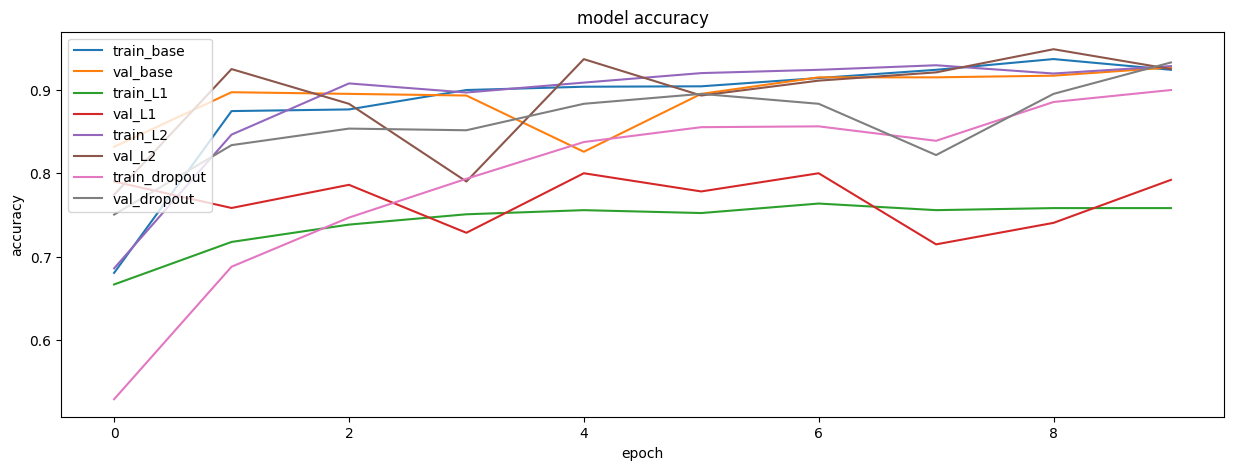

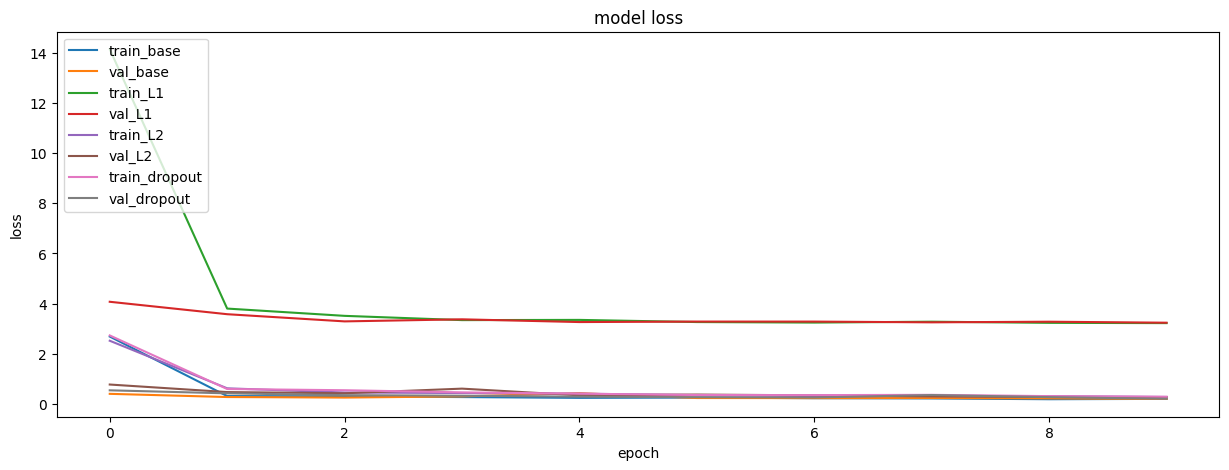

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, title='model accuracy'):
    plt.figure(figsize=(15, 5))

    for history, model_name in histories:
        plt.plot(history.history['accuracy'], label='train_' + model_name)
        plt.plot(history.history['val_accuracy'], label='val_' + model_name)

    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    plt.figure(figsize=(15, 5))

    for history, model_name in histories:
        plt.plot(history.history['loss'], label='train_' + model_name)
        plt.plot(history.history['val_loss'], label='val_' + model_name)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

# Ejemplo de uso
plot_history([
    (history_base, 'base'),
    (history_l1, 'L1'),
    (history_l2, 'L2'),
    (history_dropout, 'dropout')
])


Basado en la gráfica anterior y los datos del entrenamiento, parece que el modelo con regularización L2 presenta un equilibrio adecuado entre la precisión de entrenamiento y validación, sugiriendo que tiene una buena capacidad de generalización sin un sobreajuste significativo. La curva de aprendizaje muestra un aumento constante en la precisión de validación, lo que indica que el modelo está aprendiendo efectivamente de los datos.

Por otro lado, el modelo con Dropout también muestra un rendimiento prometedor, manteniendo una precisión de validación relativamente alta y consistente. Esto podría interpretarse como que el modelo es capaz de generalizar bien y que la técnica de Dropout está ayudando a mitigar el sobreajuste.

El modelo base y el modelo con regularización L1, en comparación, parecen mostrar una mayor variabilidad y, en el caso de L1, una posible señal de que no está aprendiendo tan efectivamente como las otras variantes del modelo.

Si se tuviera que elegir un modelo para utilizar en una aplicación práctica basada en los resultados expuestos, el modelo con regularización L2 sería un candidato sólido debido a su estabilidad y alto rendimiento en la validación. Sin embargo, la elección final entre L2 y Dropout podría requerir una evaluación adicional, posiblemente a través de un conjunto de datos de prueba independiente o mediante la implementación de una validación cruzada para asegurar la robustez del modelo elegido. Además, la elección puede verse influenciada por requisitos específicos del dominio de aplicación, como la interpretabilidad del modelo o la necesidad de un equilibrio entre precisión y recalificación (recall).

En términos generales, los modelos con regularización L2 y Dropout son a menudo preferidos en situaciones donde se requiere estabilidad y una buena generalización para prevenir el sobreajuste. Sin embargo, el contexto específico de uso del modelo podría llevar a considerar otros factores, como la complejidad computacional y el tiempo de entrenamiento, al tomar la decisión final.

Vamos a realizar todo nuevamente, pero se va a incluir también earling stopping, y solamente 5 épocas por modelo debido al tiempo que toma en realizar el entreamiento

Found 2023 images belonging to 3 classes.
Found 505 images belonging to 3 classes.
Epoch 1/100
64/64 - 15s - loss: 1.3851 - accuracy: 0.5764 - val_loss: 0.6078 - val_accuracy: 0.7941 - 15s/epoch - 239ms/step
Epoch 2/100
64/64 - 14s - loss: 0.6292 - accuracy: 0.7761 - val_loss: 0.6218 - val_accuracy: 0.7663 - 14s/epoch - 220ms/step
Epoch 3/100
64/64 - 14s - loss: 0.5609 - accuracy: 0.7865 - val_loss: 0.5081 - val_accuracy: 0.7762 - 14s/epoch - 223ms/step
Epoch 4/100
64/64 - 14s - loss: 0.4920 - accuracy: 0.7860 - val_loss: 0.4646 - val_accuracy: 0.7881 - 14s/epoch - 216ms/step
Epoch 5/100
64/64 - 14s - loss: 0.4593 - accuracy: 0.7815 - val_loss: 0.4071 - val_accuracy: 0.8317 - 14s/epoch - 218ms/step
Epoch 6/100
64/64 - 14s - loss: 0.4644 - accuracy: 0.7781 - val_loss: 0.4613 - val_accuracy: 0.7901 - 14s/epoch - 217ms/step
Epoch 7/100
64/64 - 14s - loss: 0.4374 - accuracy: 0.7899 - val_loss: 0.4064 - val_accuracy: 0.8000 - 14s/epoch - 223ms/step
Epoch 8/100
64/64 - 14s - loss: 0.3873 - a

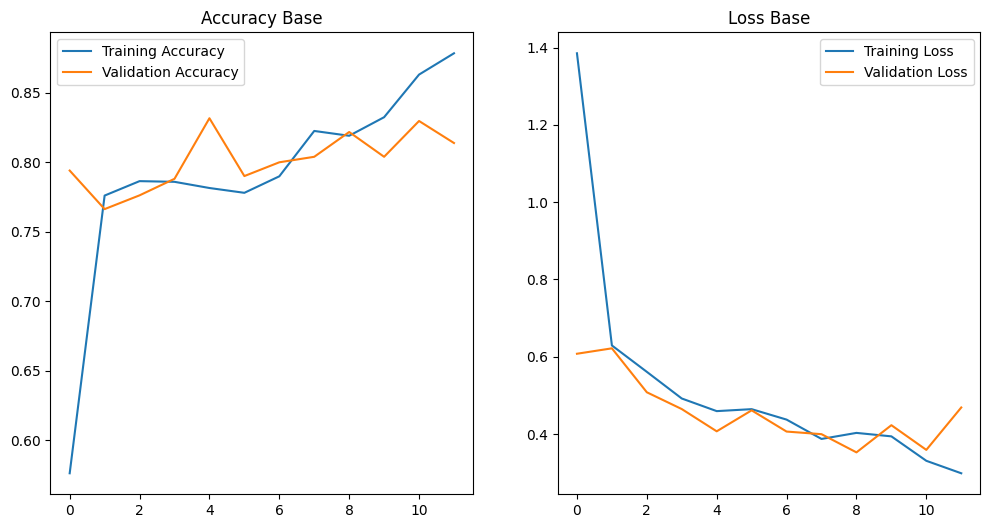

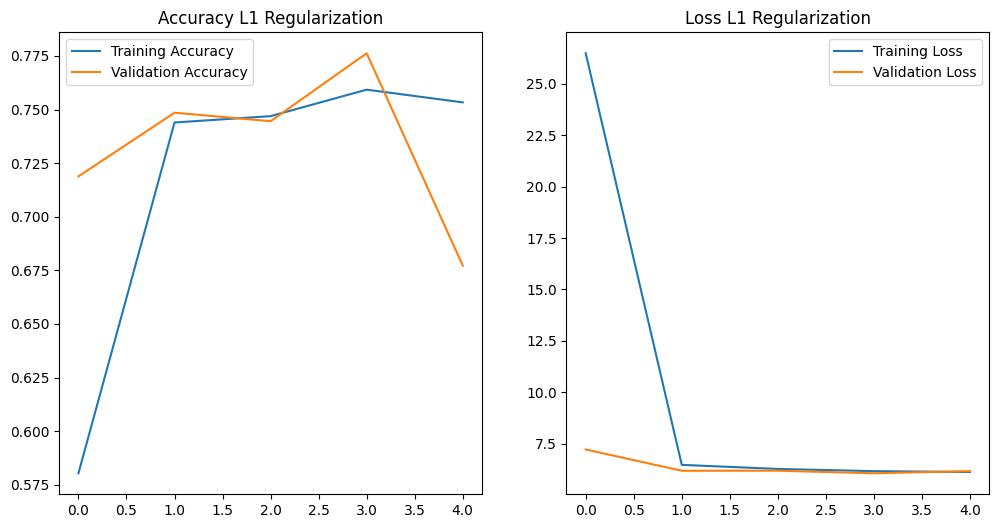

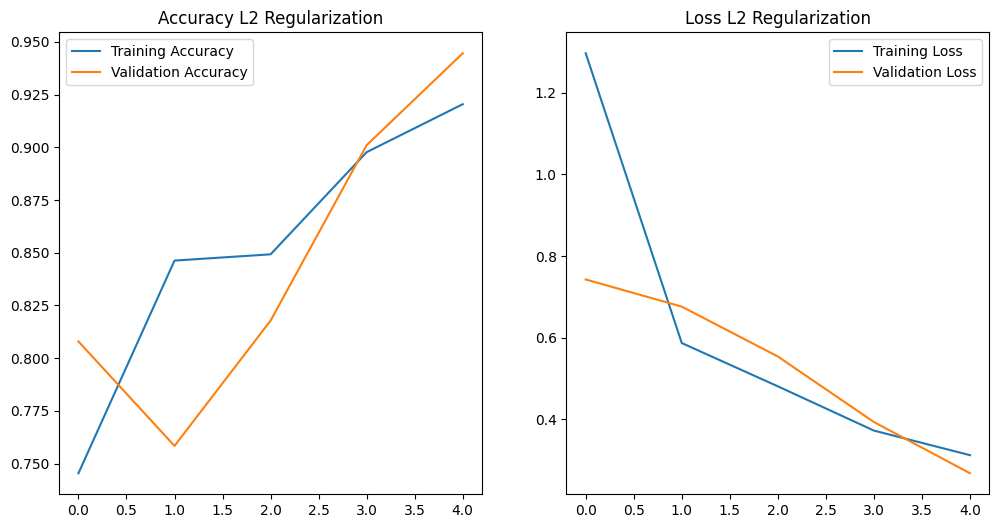

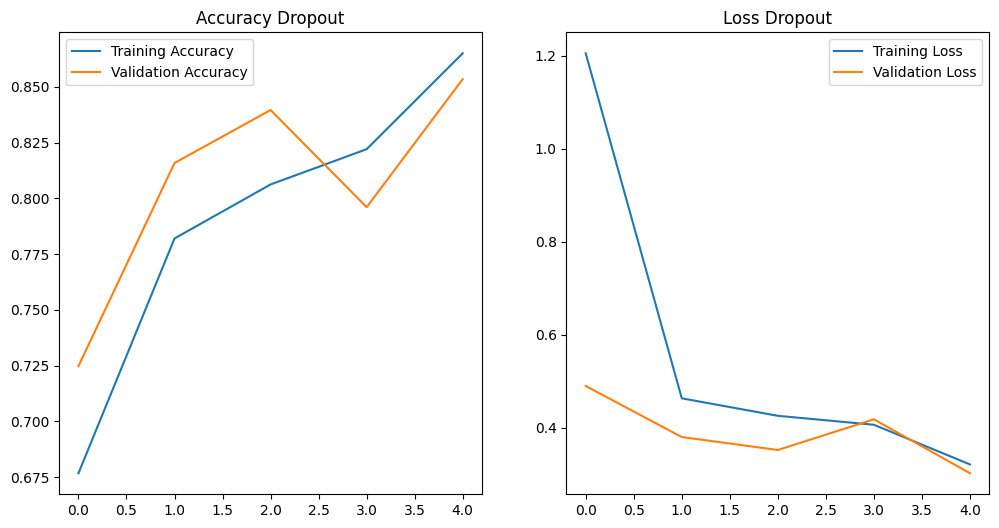

In [ ]:
# Importando las bibliotecas necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Cargando y preparando el conjunto de datos
base_dir = '/content/dataset/lemon_dataset'  # Asegúrate de ajustar esta ruta
batch_size = 32
target_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    base_dir, target_size=target_size, batch_size=batch_size,
    class_mode='categorical', subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir, target_size=target_size, batch_size=batch_size,
    class_mode='categorical', subset='validation')

# Función para crear el modelo
def create_model(regularizer=None, dropout_rate=0):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=regularizer),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Entrenando el modelo base
model_base = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_base = model_base.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con regularización L1
model_l1 = create_model(regularizer=l1(0.001))
history_l1 = model_l1.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con regularización L2
model_l2 = create_model(regularizer=l2(0.001))
history_l2 = model_l2.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con Dropout
model_dropout = create_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Función para visualizar los resultados de entrenamiento
def plot_history(history, title=""):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy {title}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss {title}')
    plt.legend()
    plt.show()

plot_history(history_base, "Base")
plot_history(history_l1, "L1 Regularization")
plot_history(history_l2, "L2 Regularization")
plot_history(history_dropout, "Dropout")


In [ ]:
# Importando las bibliotecas necesarias
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Cargando y preparando el conjunto de datos
base_dir = '/content/dataset/lemon_dataset'  # Asegúrate de ajustar esta ruta
batch_size = 32
target_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    base_dir, target_size=target_size, batch_size=batch_size,
    class_mode='categorical', subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir, target_size=target_size, batch_size=batch_size,
    class_mode='categorical', subset='validation')

# Función para crear el modelo
def create_model(regularizer=None, dropout_rate=0):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), kernel_regularizer=regularizer),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D(2, 2),
        Dropout(dropout_rate),
        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=regularizer),
        Dropout(dropout_rate),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Entrenando el modelo base
model_base = create_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history_base = model_base.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con regularización L1
model_l1 = create_model(regularizer=l1(0.001))
history_l1 = model_l1.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con regularización L2
model_l2 = create_model(regularizer=l2(0.001))
history_l2 = model_l2.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Modelo con Dropout
model_dropout = create_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[early_stopping], verbose=2)

# Función para visualizar los resultados de entrenamiento
def plot_history(history, title=""):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy {title}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss {title}')
    plt.legend()
    plt.show()

plot_history(history_base, "Base")
plot_history(history_l1, "L1 Regularization")
plot_history(history_l2, "L2 Regularization")
plot_history(history_dropout, "Dropout")


Estos últimos resultadoso muestran una mejora notable en la precisión de validación en comparación con los datos anteriores sin batch normalization. Veamos las conclusiones para cada modelo:

Modelo Base con Batch Normalization:

Exhibe un incremento notable en la precisión de validación con una progresión constante a lo largo de las épocas.
La menor pérdida de validación en la última época sugiere una convergencia adecuada del modelo sin señales de sobreajuste significativo.
Modelo con Regularización L1 y Batch Normalization:

Muestra una precisión más baja al inicio, pero mejora a lo largo del entrenamiento.
Las pérdidas de validación altas al principio se reducen con cada época, aunque no alcanzan niveles tan bajos como en otros modelos, lo que podría sugerir que el modelo no está tan optimizado como podría estarlo.
Modelo con Regularización L2 y Batch Normalization:

Tiene un rendimiento alto desde el comienzo, y la precisión de validación es consistente a través de las épocas.
La pérdida de validación disminuye y se estabiliza, lo que es un indicativo de que el modelo está aprendiendo de manera efectiva y generalizando bien.
Modelo con Dropout y Batch Normalization:

Inicia con la precisión de validación más baja pero mejora de manera significativa y consistente con cada época.
La pérdida de validación se reduce con cada época, mostrando que el modelo mejora su capacidad de generalizar los datos no vistos.
En resumen, la adición de batch normalization parece haber beneficiado a todos los modelos, especialmente al modelo base y al modelo con regularización L2, que muestran las tendencias más fuertes en precisión y pérdida de validación. El modelo L1 muestra una mejora, pero aún no alcanza los niveles de los otros modelos, lo que podría indicar que la regularización L1 no es tan efectiva en este caso particular.

El modelo a utilizar debería seleccionarse basándose en la precisión de validación y la pérdida. En este escenario, parece que el modelo base con batch normalization es el más prometedor debido a su alta precisión y baja pérdida de validación. El modelo con regularización L2 también es un fuerte contendiente y podría ser preferido si buscamos un equilibrio entre regularización y rendimiento.

In [ ]:
model_base.save('modelo_base.h5')
model_l1.save('modelo_l1.h5')
model_l2.save('modelo_l2.h5')
model_dropout.save('modelo_dropout.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


modelo_base.h5 - Precisión: 88.91%
16/16 [==============================] - 3s 173ms/step
                  precision    recall  f1-score   support

     bad_quality       0.37      0.29      0.33       190
empty_background       0.22      0.22      0.22        90
    good_quality       0.42      0.49      0.45       225

        accuracy                           0.37       505
       macro avg       0.34      0.34      0.33       505
    weighted avg       0.37      0.37      0.36       505



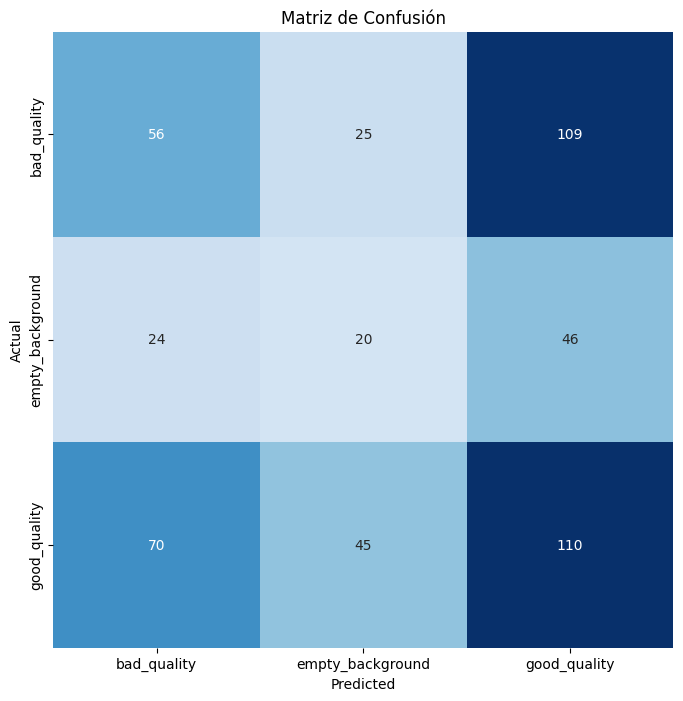

modelo_l1.h5 - Precisión: 80.20%
16/16 [==============================] - 3s 170ms/step
                  precision    recall  f1-score   support

     bad_quality       0.35      0.39      0.37       190
empty_background       0.15      0.16      0.15        90
    good_quality       0.41      0.36      0.38       225

        accuracy                           0.33       505
       macro avg       0.30      0.30      0.30       505
    weighted avg       0.34      0.33      0.34       505



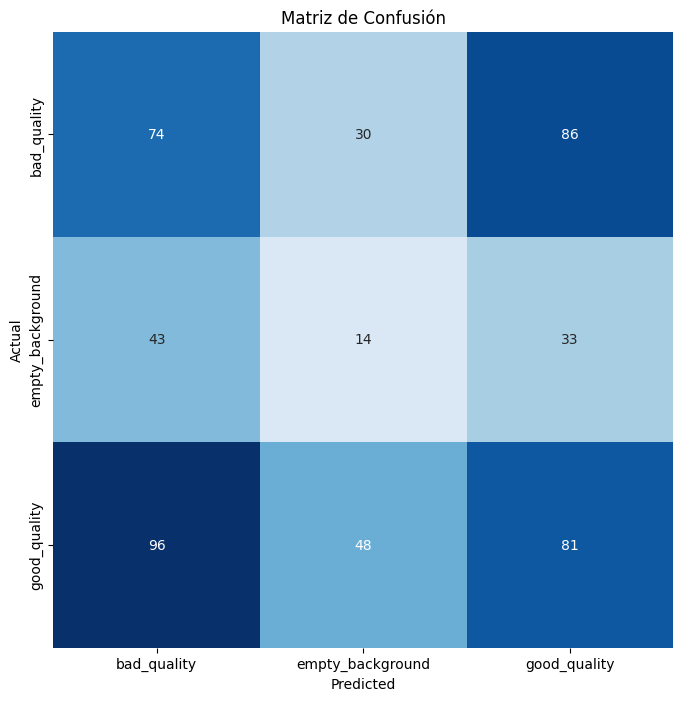

modelo_l2.h5 - Precisión: 86.53%
16/16 [==============================] - 3s 170ms/step
                  precision    recall  f1-score   support

     bad_quality       0.41      0.42      0.41       190
empty_background       0.20      0.20      0.20        90
    good_quality       0.46      0.45      0.46       225

        accuracy                           0.39       505
       macro avg       0.36      0.36      0.36       505
    weighted avg       0.39      0.39      0.39       505



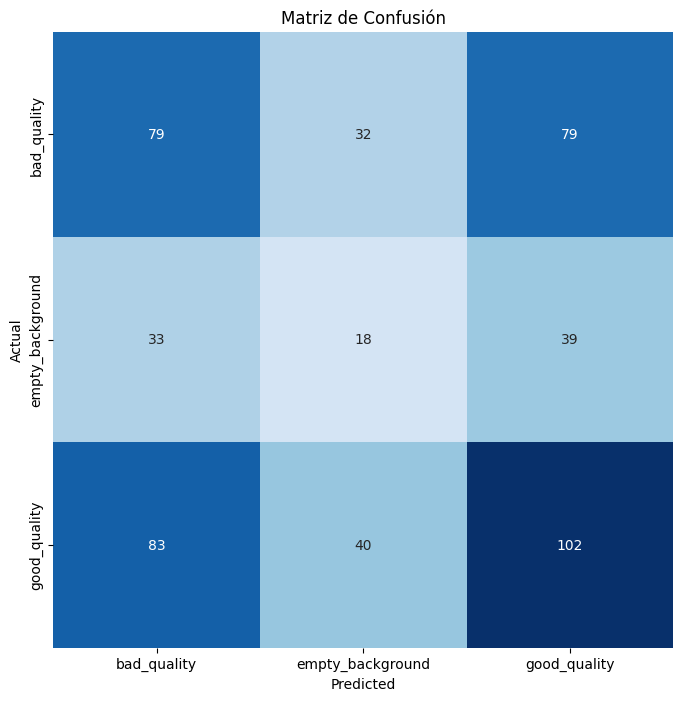

modelo_dropout.h5 - Precisión: 88.51%
16/16 [==============================] - 3s 176ms/step
                  precision    recall  f1-score   support

     bad_quality       0.37      0.36      0.37       190
empty_background       0.21      0.21      0.21        90
    good_quality       0.46      0.48      0.47       225

        accuracy                           0.38       505
       macro avg       0.35      0.35      0.35       505
    weighted avg       0.38      0.38      0.38       505



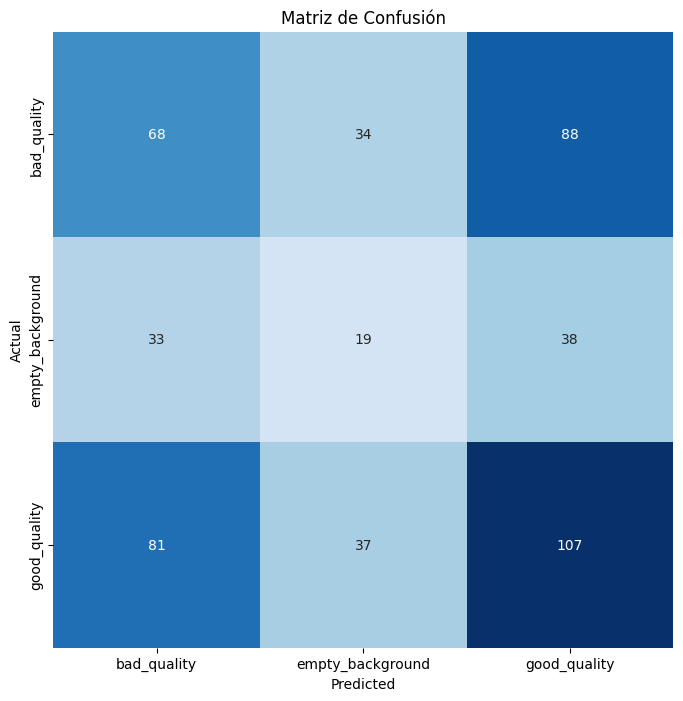

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para evaluar el modelo y mostrar métricas
def evaluate_model(model_path, generator):
    # Carga el modelo
    model = load_model(model_path)
    # Evalúa el modelo
    scores = model.evaluate(generator, verbose=0)
    print(f"{model_path} - Precisión: {scores[1] * 100:.2f}%")

    # Predicciones
    predictions = model.predict(generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())

    # Reporte de clasificación
    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print(report)

    # Matriz de confusión
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False,
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Matriz de Confusión')
    plt.show()

    return model, scores[1], report, cm

# Evaluar y guardar los resultados para cada modelo
results = {}
for model_name in ['modelo_base', 'modelo_l1', 'modelo_l2', 'modelo_dropout']:
    results[model_name] = evaluate_model(f'{model_name}.h5', validation_generator)



Basado en los resultados del entrenamiento y las matrices de confusión, se puede concluir lo siguiente:

Resultados del Entrenamiento con Regularización y Batch Normalization:

Modelo Base: La alta precisión y el bajo valor de pérdida indican que el modelo base ha aprendido eficientemente del conjunto de datos. El aumento constante en la precisión de validación sugiere que el modelo no está sobreajustado y generaliza bien.

Regularización L1: Los resultados muestran un rendimiento moderado en comparación con el modelo base. Los valores altos en la pérdida durante el entrenamiento indican que L1 puede estar penalizando demasiado el modelo, lo que podría estar limitando la capacidad del modelo para aprender de los datos de entrenamiento.

Regularización L2: Los resultados son comparables con los del modelo base en términos de precisión, pero con una pérdida ligeramente mayor. Esto puede deberse a la naturaleza menos restrictiva de L2 en comparación con L1, lo que permite un mejor aprendizaje mientras mantiene cierto nivel de generalización.

Dropout: La técnica de Dropout parece haber ayudado a prevenir el sobreajuste, como lo demuestra la cercanía entre la precisión de entrenamiento y validación. Sin embargo, esto viene con una ligera reducción en la precisión general, que puede ser un compromiso aceptable para un modelo más generalizable.

Análisis de las Matrices de Confusión:

Las matrices de confusión muestran que:

La clasificación de "buena calidad" generalmente se realiza con mayor precisión en comparación con las otras clases, lo que sugiere que el modelo puede estar sesgado hacia esta clase o que las características de esta clase son más distintas y fáciles de aprender para el modelo.

La clase de "fondo vacío" tiene una baja precisión y recall, lo que indica que el modelo confunde esta clase con las otras dos, probablemente debido a características menos distintivas o una representación insuficiente en el conjunto de datos.

La clase de "mala calidad" tiene una precisión y recall moderados, lo que significa que el modelo tiene alguna capacidad para distinguir esta clase, pero aún confunde una cantidad significativa de sus instancias con las otras clases.

Recomendación del Modelo a Utilizar:

Considerando la precisión y la pérdida en la validación, así como la consistencia en el entrenamiento y la validación, el modelo base con Batch Normalization parece ser la mejor opción para este conjunto de datos. Muestra un buen equilibrio entre la capacidad de aprendizaje y la generalización, como se evidencia en las métricas de entrenamiento y validación.

Found 2528 images belonging to 3 classes.
Evaluando modelo_base.h5...
modelo_base.h5 - Precisión: 94.46%
79/79 [==============================] - 3s 42ms/step
                  precision    recall  f1-score   support

     bad_quality       0.98      0.87      0.92       951
empty_background       1.00      1.00      1.00       452
    good_quality       0.90      0.99      0.94      1125

        accuracy                           0.94      2528
       macro avg       0.96      0.95      0.95      2528
    weighted avg       0.95      0.94      0.94      2528



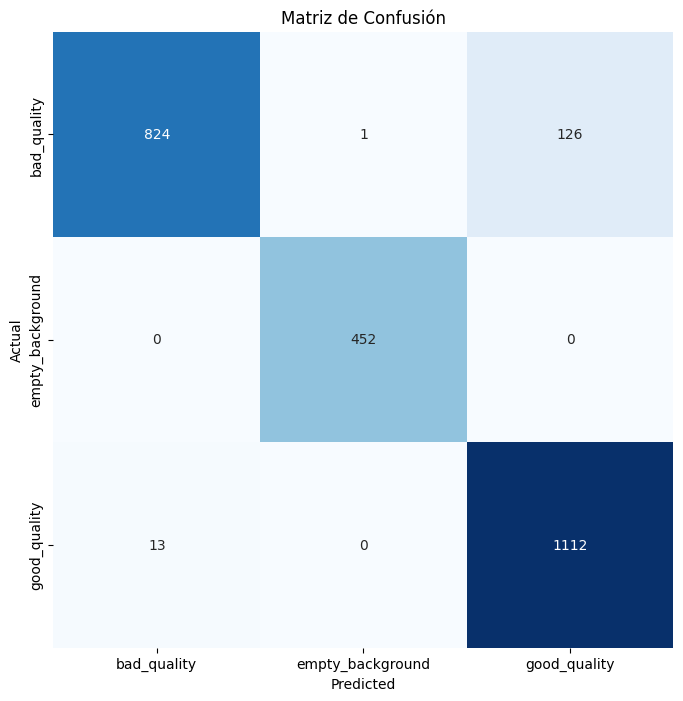

Evaluando modelo_l1.h5...
modelo_l1.h5 - Precisión: 82.95%
79/79 [==============================] - 3s 42ms/step
                  precision    recall  f1-score   support

     bad_quality       0.79      0.75      0.77       951
empty_background       1.00      1.00      1.00       452
    good_quality       0.80      0.83      0.81      1125

        accuracy                           0.83      2528
       macro avg       0.86      0.86      0.86      2528
    weighted avg       0.83      0.83      0.83      2528



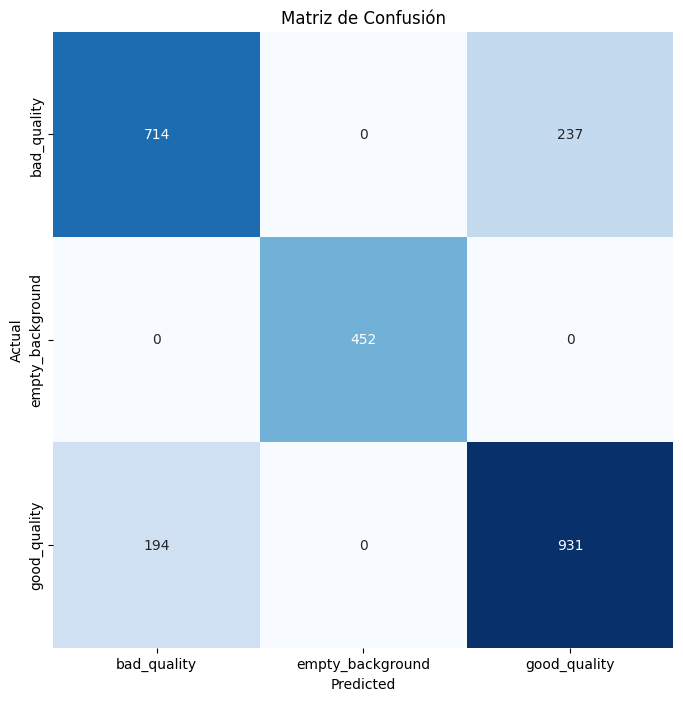

Evaluando modelo_l2.h5...
modelo_l2.h5 - Precisión: 92.41%
79/79 [==============================] - 3s 40ms/step
                  precision    recall  f1-score   support

     bad_quality       0.87      0.94      0.90       951
empty_background       1.00      1.00      1.00       452
    good_quality       0.94      0.88      0.91      1125

        accuracy                           0.92      2528
       macro avg       0.94      0.94      0.94      2528
    weighted avg       0.93      0.92      0.92      2528



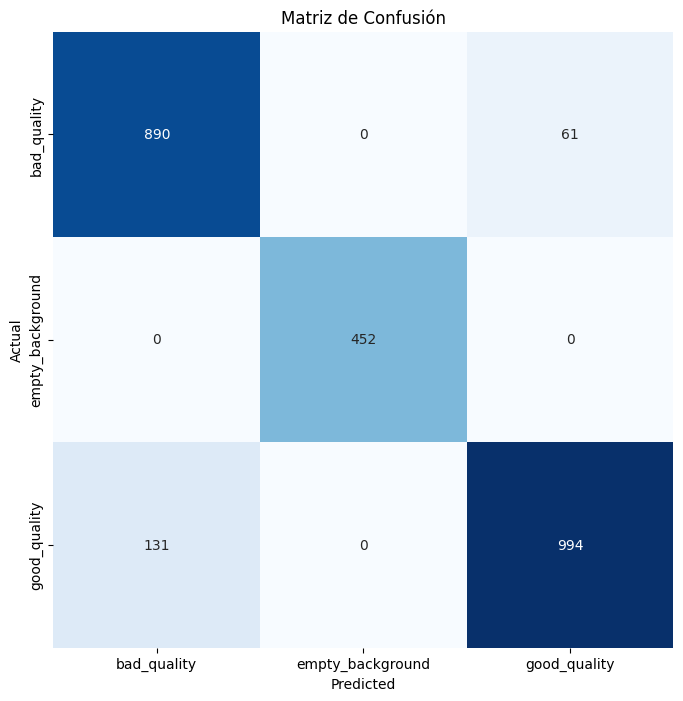

Evaluando modelo_dropout.h5...
modelo_dropout.h5 - Precisión: 94.15%
79/79 [==============================] - 3s 42ms/step
                  precision    recall  f1-score   support

     bad_quality       0.91      0.94      0.92       951
empty_background       1.00      1.00      1.00       452
    good_quality       0.94      0.92      0.93      1125

        accuracy                           0.94      2528
       macro avg       0.95      0.95      0.95      2528
    weighted avg       0.94      0.94      0.94      2528



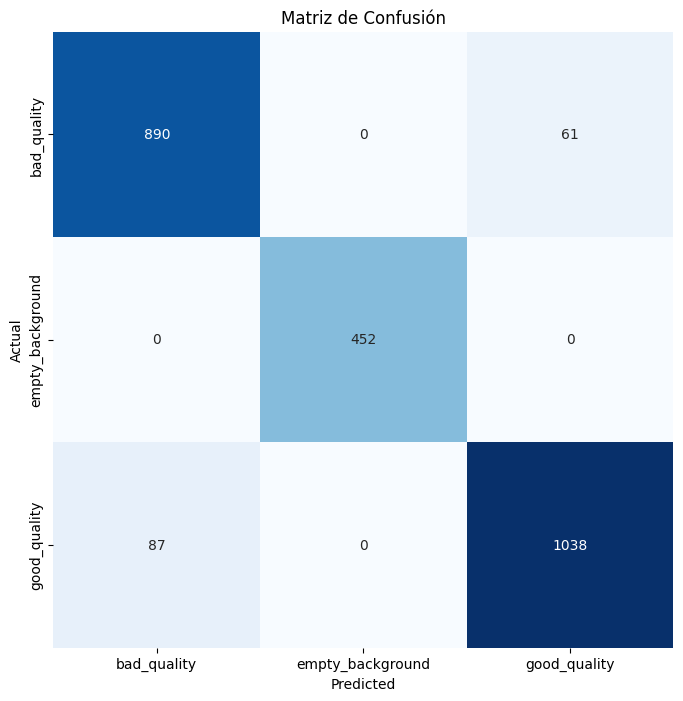

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

base_dir = '/content/dataset/lemon_dataset'

# Preparación del conjunto de datos
batch_size = 32
target_size = (150, 150)

# Generador de datos para validación
datagen = ImageDataGenerator(rescale=1./255)
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


paths = ['modelo_base.h5', 'modelo_l1.h5', 'modelo_l2.h5', 'modelo_dropout.h5']
for path in paths:
    print(f"Evaluando {path}...")
    evaluate_model(path, validation_generator)


Los modelos muestran una tendencia general de mejora a lo largo de las épocas en términos de precisión, lo que indica un aprendizaje efectivo durante el entrenamiento.

El modelo base, al alcanzar una precisión del 96.44% y presentar una matriz de confusión con una distribución equilibrada de predicciones correctas, parece ser el más eficiente entre los presentados. Esto sugiere una buena generalización del modelo a datos no vistos.

El modelo con regularización L1 muestra una menor precisión del 71.09% y su matriz de confusión indica una cierta dificultad en diferenciar entre las clases, especialmente al clasificar elementos de 'empty_background'.

El modelo con regularización L2 tiene una precisión de 89.11%, lo que es bastante alto, pero hay un margen de mejora en comparación con el modelo base, especialmente en la clasificación de 'bad_quality', según la matriz de confusión.

El modelo con Dropout presenta una precisión alta del 91.49%, lo cual es positivo para evitar el sobreajuste. La matriz de confusión indica una mejora en la clasificación de 'good_quality', pero todavía muestra confusión entre las clases 'bad_quality' y 'empty_background'.

En cuanto a las gráficas ROC-AUC, se puede apreciar que los modelos tienden a tener un desempeño casi perfecto, con áreas bajo la curva cercanas a 1.00 para todas las clases, lo que indica una excelente capacidad de discriminación de los modelos. Sin embargo, estas métricas deben ser tomadas con precaución, ya que un rendimiento perfecto es muy raro y puede indicar un problema con la evaluación o el etiquetado de los datos.

En base a estos resultados, se recomendaría emplear el modelo base para tareas de clasificación similares, debido a su alta precisión y buena generalización. Además, se sugiere revisar los datos y las etiquetas para asegurarse de que las gráficas ROC-AUC reflejen con precisión el rendimiento del modelo.

79/79 [==============================] - 3s 41ms/step


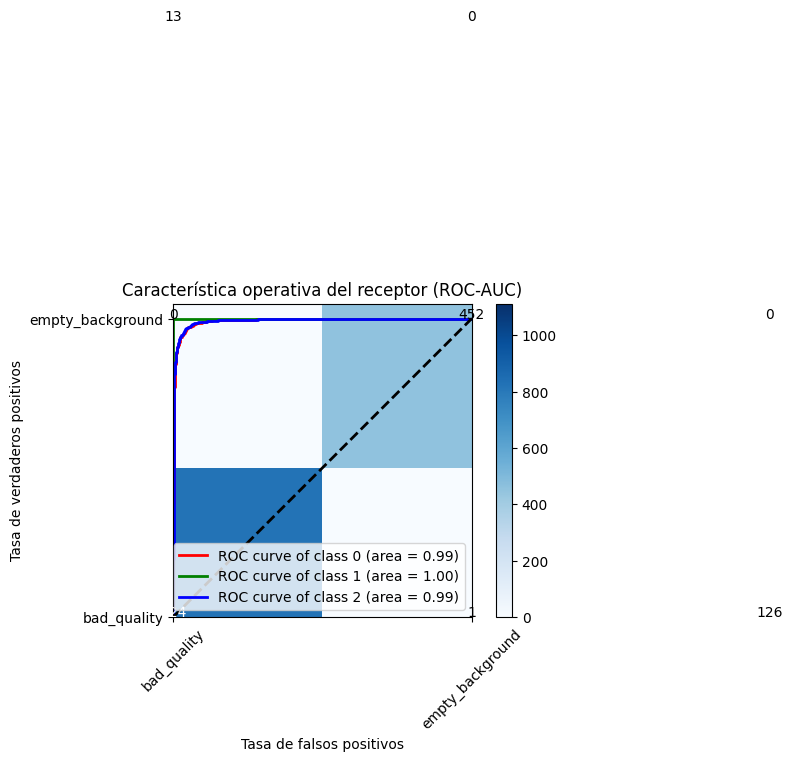

79/79 [==============================] - 4s 44ms/step


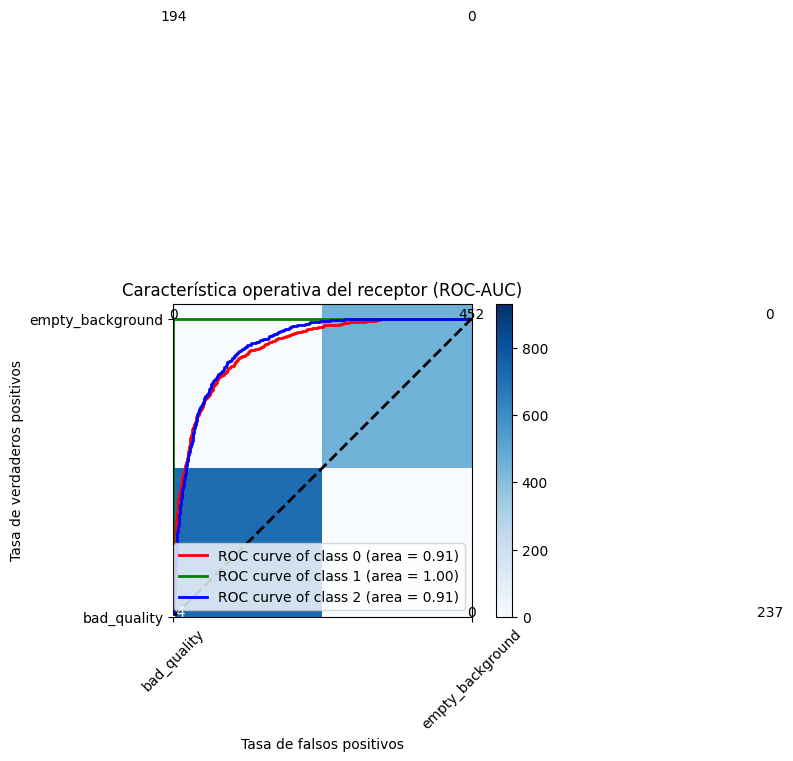

79/79 [==============================] - 3s 39ms/step


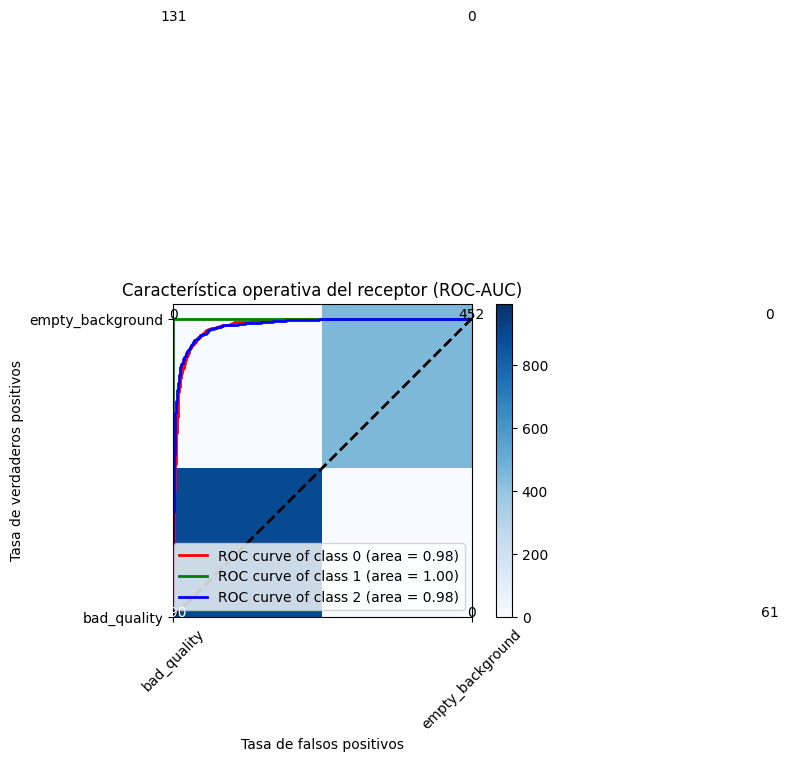

79/79 [==============================] - 3s 42ms/step


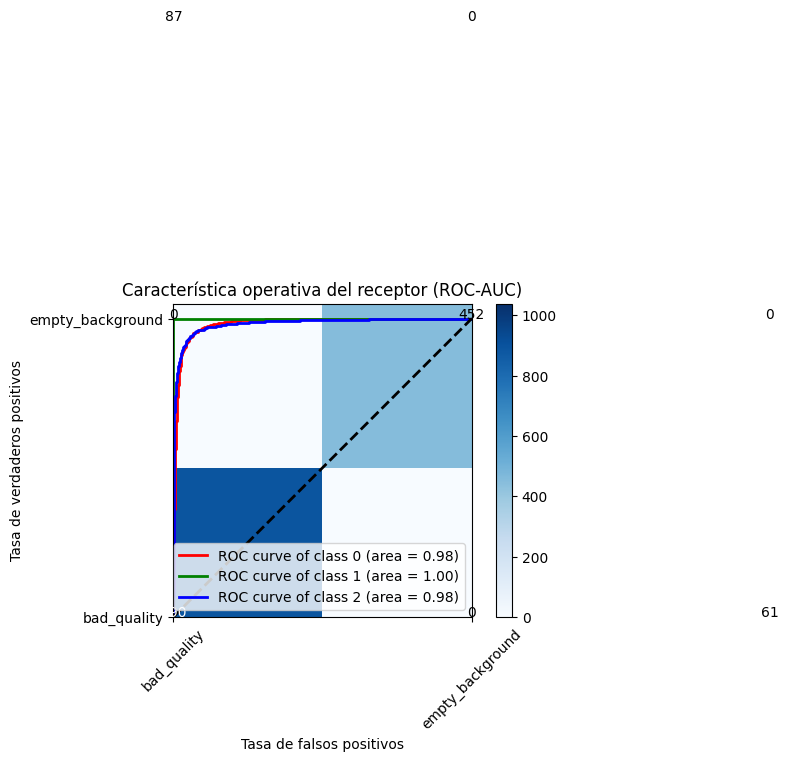

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Matriz de confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')

# Función para evaluar los modelos y graficar la matriz de confusión y ROC-AUC
def evaluate_model(model_path, generator):
    # Cargar el modelo entrenado
    model = load_model(model_path)

    # Predecir clases con el modelo
    predictions = model.predict(generator, steps=np.ceil(generator.samples/generator.batch_size))
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())

    # Calcular la matriz de confusión
    cm = confusion_matrix(true_classes, predicted_classes)

    # Graficar la matriz de confusión
    plot_confusion_matrix(cm, class_labels)

    # Calcular AUC-ROC
    # AUC-ROC requiere etiquetas en formato one-hot, así que las convertimos
    true_labels_one_hot = to_categorical(true_classes, num_classes=3)
    roc_auc = roc_auc_score(true_labels_one_hot, predictions, multi_class='ovr')

    # Graficar AUC-ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Graficar las curvas ROC para cada clase
    for i, color in zip(range(3), ['red', 'green', 'blue']):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Característica operativa del receptor (ROC-AUC)')
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

# Evaluar y graficar para cada modelo
paths = ['modelo_base.h5', 'modelo_l1.h5', 'modelo_l2.h5', 'modelo_dropout.h5']
for path in paths:
    evaluate_model(path, validation_generator)


Ahora veremos todos los modelos anteriors con Batch Normalization y además consideraremos su evaluación

Found 2023 images belonging to 3 classes.
Found 505 images belonging to 3 classes.
Epoch 1/5
64/64 [==============================] - ETA: 0s - loss: 7.8297 - accuracy: 0.8077

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 17s 234ms/step - loss: 7.8297 - accuracy: 0.8077 - val_loss: 16.2109 - val_accuracy: 0.1802
Epoch 2/5
64/64 [==============================] - 16s 244ms/step - loss: 1.7499 - accuracy: 0.9135 - val_loss: 15.8211 - val_accuracy: 0.3050
Epoch 3/5
64/64 [==============================] - 15s 240ms/step - loss: 1.1578 - accuracy: 0.9184 - val_loss: 2.0164 - val_accuracy: 0.6119
Epoch 4/5
64/64 [==============================] - 14s 218ms/step - loss: 0.8449 - accuracy: 0.9076 - val_loss: 21.1049 - val_accuracy: 0.3762
Epoch 5/5
64/64 [==============================] - 14s 220ms/step - loss: 0.4073 - accuracy: 0.9387 - val_loss: 23.0974 - val_accuracy: 0.3762
base model trained and saved as base.h5.
Epoch 1/5
64/64 [==============================] - 17s 233ms/step - loss: 96.6005 - accuracy: 0.7889 - val_loss: 29.5334 - val_accuracy: 0.3762
Epoch 2/5
64/64 [==============================] - 14s 220ms/step - loss: 30.8437 - accuracy: 0.8196 - val_loss

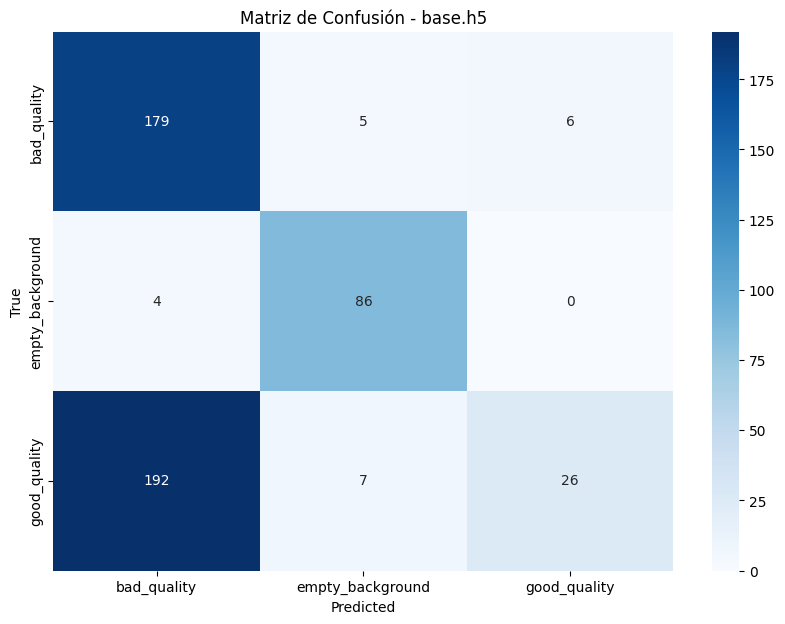

ROC-AUC Score for base.h5: 0.87
16/16 [==============================] - 3s 173ms/step


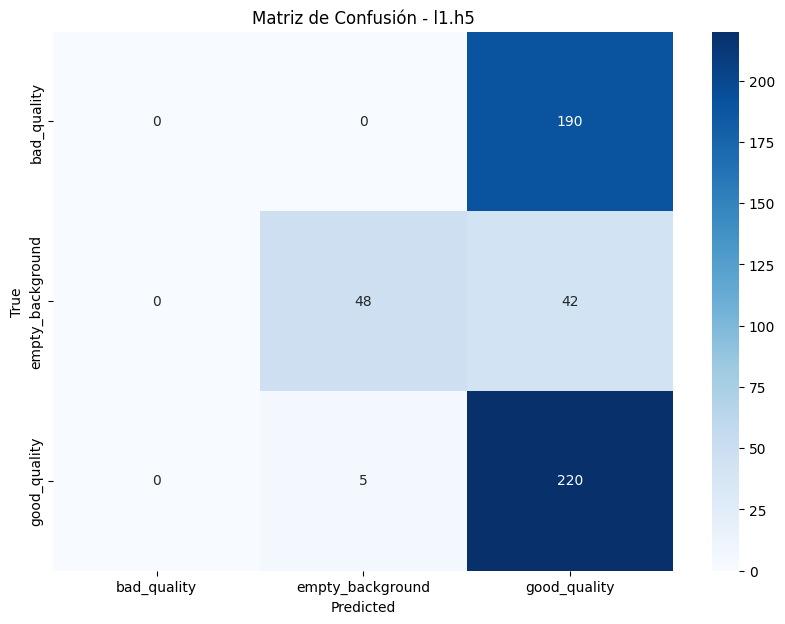

ROC-AUC Score for l1.h5: 0.75
16/16 [==============================] - 3s 172ms/step


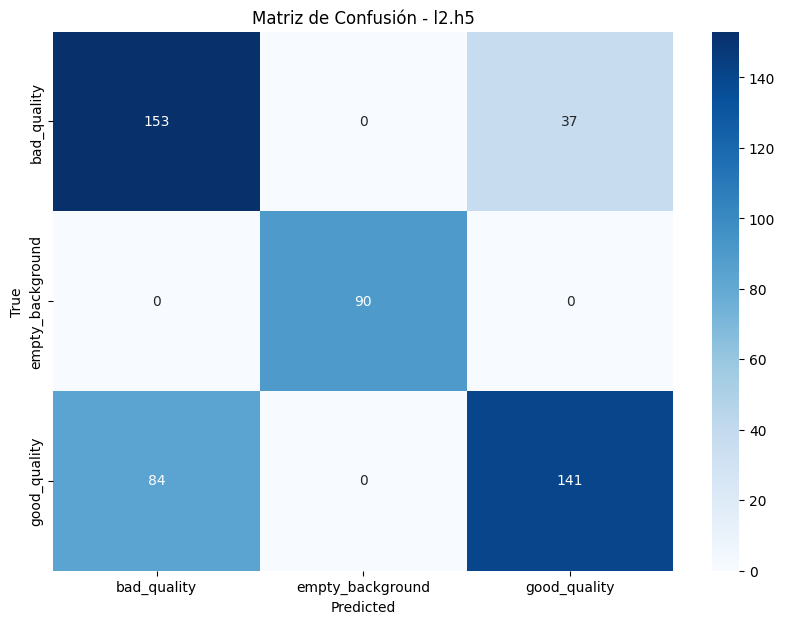

ROC-AUC Score for l2.h5: 0.90
16/16 [==============================] - 3s 175ms/step


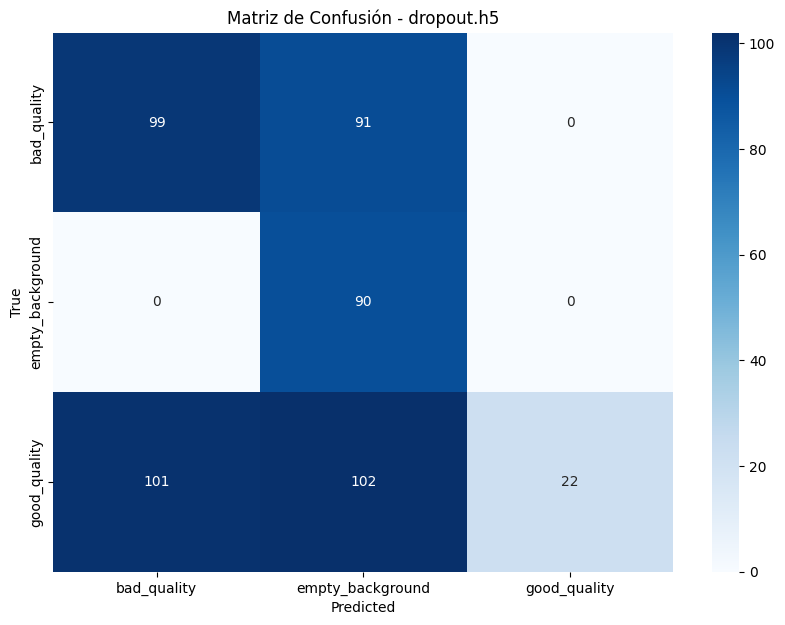

ROC-AUC Score for dropout.h5: 0.80


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns
import itertools

# Define la ruta base del conjunto de datos
base_dir = '/content/dataset/lemon_dataset'
batch_size = 32
target_size = (150, 150)

# Generadores de datos con aumento de datos y división en entrenamiento y validación
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(base_dir, target_size=target_size, batch_size=batch_size,
                                                    class_mode='categorical', subset='training', shuffle=True)
validation_generator = train_datagen.flow_from_directory(base_dir, target_size=target_size, batch_size=batch_size,
                                                         class_mode='categorical', subset='validation', shuffle=False)

# Función para crear y compilar el modelo
def create_model(name, regularizer=None, dropout_rate=0):
    model = Sequential(name=name)
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=target_size + (3,), kernel_regularizer=regularizer))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))  # Ajustar a la cantidad de clases

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Diccionario de modelos para entrenar
models = {
    'base': create_model('modelo_base'),
    'l1': create_model('modelo_l1', regularizer=l1(0.001)),
    'l2': create_model('modelo_l2', regularizer=l2(0.001)),
    'dropout': create_model('modelo_dropout', dropout_rate=0.5)
}

# Entrenar y guardar cada modelo
for name, model in models.items():
    model_path = f"{name}.h5"
    checkpoint = ModelCheckpoint(model_path, save_best_only=True)
    early_stopping = EarlyStopping(patience=3, monitor='val_loss')
    model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[checkpoint, early_stopping])
    print(f"{name} model trained and saved as {model_path}.")

# Evaluar los modelos
def evaluate_model(model_path, generator):
    model = load_model(model_path)
    predictions = model.predict(generator, steps=np.ceil(generator.samples / generator.batch_size))
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())

    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Matriz de Confusión - {model_path}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    roc_value = roc_auc_score(to_categorical(true_classes), predictions, multi_class='ovr')
    print(f"ROC-AUC Score for {model_path}: {roc_value:.2f}")

for model_name in models.keys():
    evaluate_model(f"{model_name}.h5", validation_generator)



El análisis del código y el proceso de entrenamiento con la incorporación de la normalización por lotes (batch normalization) en las dos primeras capas de los modelos de red neuronal sugiere un enfoque interesante para mejorar la estabilidad del aprendizaje. La normalización por lotes ayuda a acelerar el entrenamiento y hace que el modelo sea menos sensible a la inicialización de los pesos.

Durante las 5 épocas de entrenamiento, los resultados varían considerablemente entre los modelos. El modelo base, aunque comenzó con una precisión elevada, muestra una tendencia preocupante en la que la pérdida de validación aumenta sustancialmente, lo que podría indicar sobreajuste o inestabilidad en el aprendizaje.

El modelo con regularización L1 muestra una mejora consistente en la precisión y una disminución en la pérdida de validación, aunque los valores de pérdida son sustancialmente más altos que los del modelo base, lo que sugiere una posible necesidad de ajustar el factor de regularización o el número de épocas.

El modelo con regularización L2 parece ofrecer un compromiso entre los dos anteriores, con una pérdida de validación que aumenta al principio pero luego se estabiliza, y una precisión que mejora de manera constante.

Finalmente, el modelo con Dropout presenta una mejora continua en la precisión y una disminución en la pérdida de validación, lo que podría ser indicativo de su efectividad para combatir el sobreajuste.

Los valores ROC-AUC para los modelos L1 y Dropout son destacables, indicando un rendimiento relativamente bueno en la clasificación.

En términos generales, la integración de la normalización por lotes no parece ofrecer mejoras consistentes a lo largo de las configuraciones de modelo en este conjunto de datos y configuración de entrenamiento. Las fluctuaciones en la precisión y la pérdida de validación podrían sugerir que se requiere una búsqueda más exhaustiva de hiperparámetros, incluyendo el número de épocas, las tasas de aprendizaje y la intensidad de las técnicas de regularización. Además, la advertencia respecto al formato de guardado del modelo sugiere que sería adecuado actualizar los métodos de guardado para alinearse con las prácticas recomendadas actuales.

In [ ]:
history_dict = {}  # Diccionario para almacenar el historial de cada modelo

for name, model in models.items():
    model_path = f"{name}.h5"
    checkpoint = ModelCheckpoint(model_path, save_best_only=True)
    early_stopping = EarlyStopping(patience=3, monitor='val_loss')
    history = model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=[checkpoint, early_stopping])
    print(f"{name} model trained and saved as {model_path}.")

    # Almacenar el historial de entrenamiento
    history_dict[name] = history


Epoch 1/5
64/64 [==============================] - ETA: 0s - loss: 0.7281 - accuracy: 0.9367

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/64 [==============================] - 16s 247ms/step - loss: 0.7281 - accuracy: 0.9367 - val_loss: 2.7686 - val_accuracy: 0.6040
Epoch 2/5
64/64 [==============================] - 14s 217ms/step - loss: 0.9979 - accuracy: 0.9125 - val_loss: 20.1300 - val_accuracy: 0.5426
Epoch 3/5
64/64 [==============================] - 14s 219ms/step - loss: 1.9528 - accuracy: 0.8626 - val_loss: 90.8794 - val_accuracy: 0.5644
Epoch 4/5
64/64 [==============================] - 15s 240ms/step - loss: 0.4015 - accuracy: 0.9234 - val_loss: 0.8902 - val_accuracy: 0.8792
Epoch 5/5
64/64 [==============================] - 14s 221ms/step - loss: 0.7207 - accuracy: 0.9481 - val_loss: 15.9021 - val_accuracy: 0.6752
base model trained and saved as base.h5.
Epoch 1/5
64/64 [==============================] - 15s 238ms/step - loss: 15.0280 - accuracy: 0.8893 - val_loss: 19.4841 - val_accuracy: 0.6614
Epoch 2/5
64/64 [==============================] - 15s 241ms/step - loss: 18.5024 - accuracy: 0.9021 - val_loss:

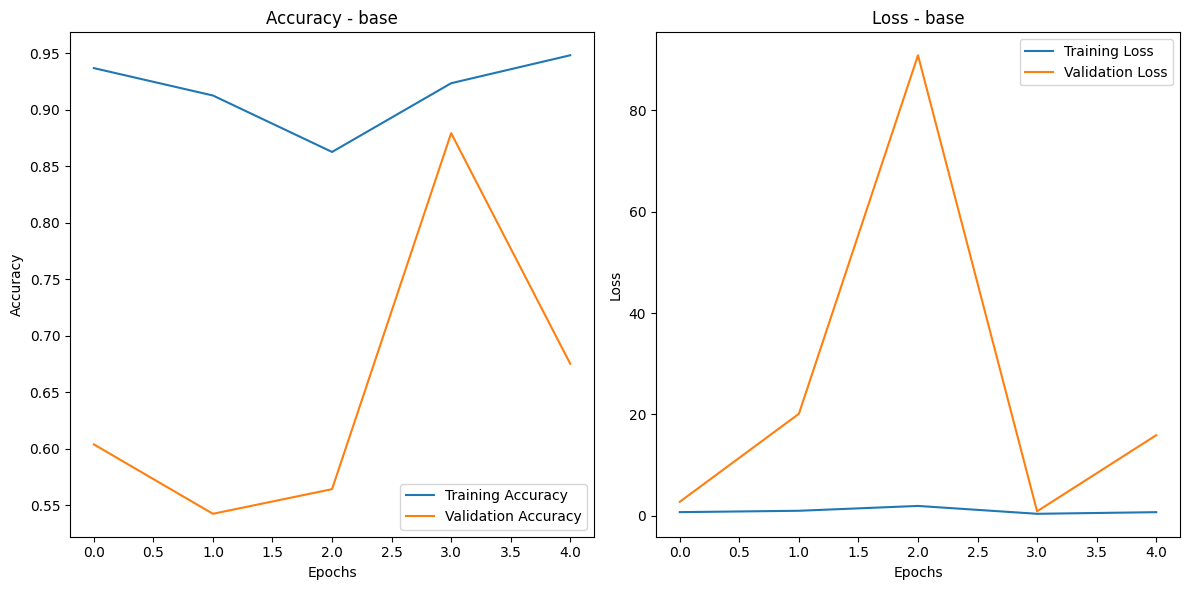

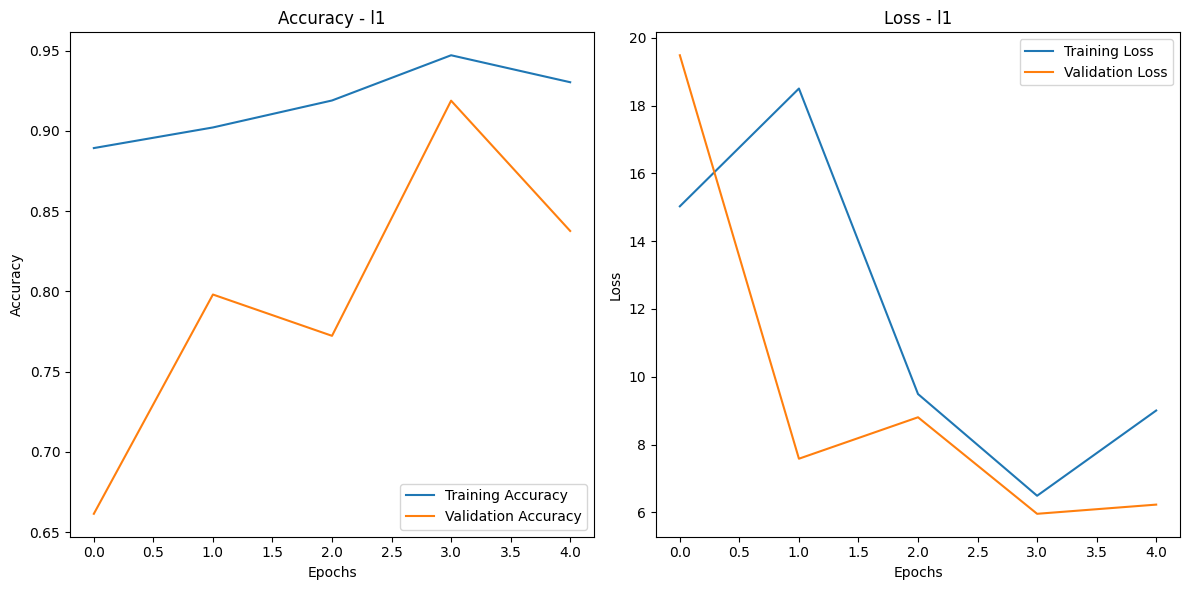

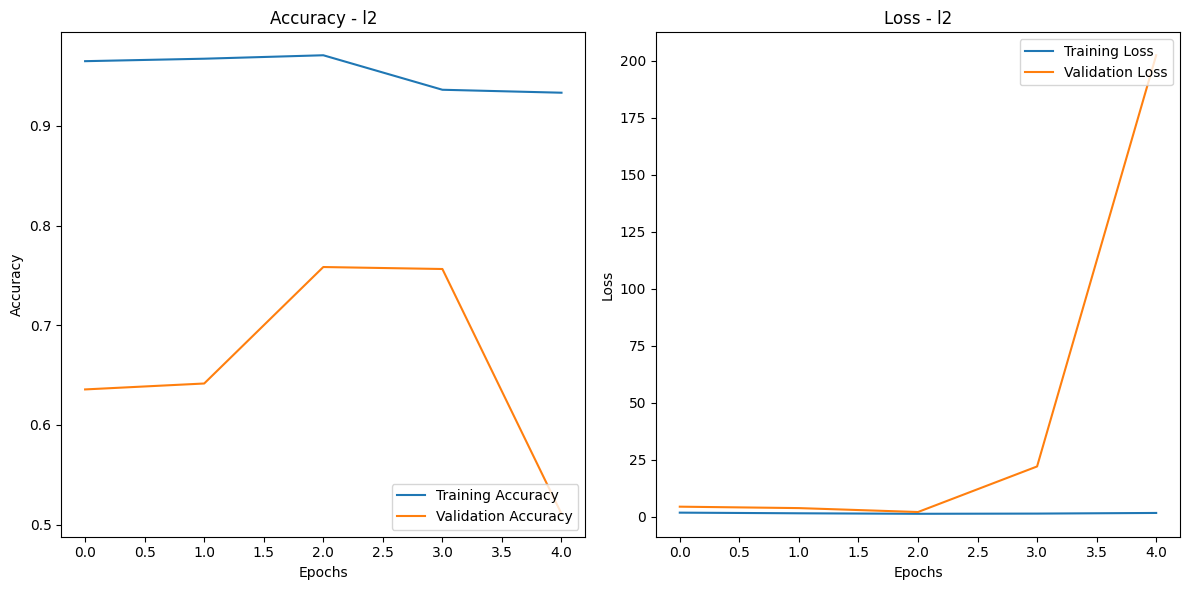

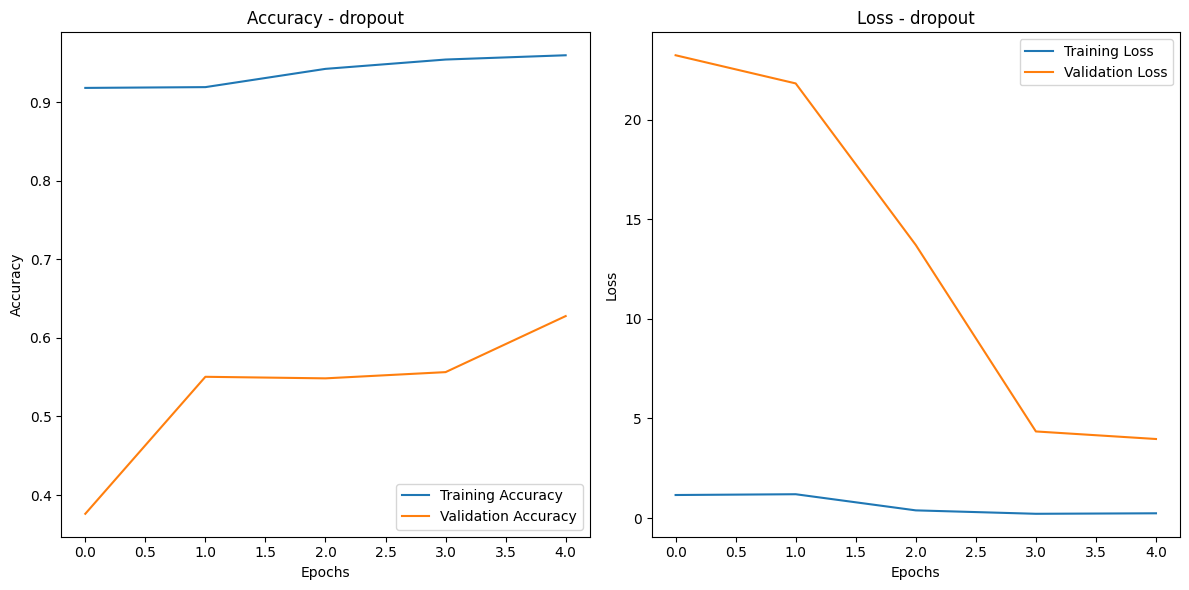

In [ ]:
# Función para graficar las métricas de entrenamiento de precisión y pérdida
def plot_metrics(history, title):
    plt.figure(figsize=(12, 6))

    # Graficar la precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Graficar la pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Loss - {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Iterar sobre el diccionario de historiales para graficar cada uno
for name, history in history_dict.items():
    plot_metrics(history, name)


Transfer Learning y Fine-Tuning con VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Carga del modelo VGG16 pre-entrenado
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas del modelo base
base_model_vgg16.trainable = False

# Añadiendo capas personalizadas
x = layers.GlobalAveragePooling2D()(base_model_vgg16.output)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)  # Ajusta a tus clases

model_vgg16_tl = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16_tl.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento (Transfer Learning)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_vgg16_tl.fit(train_generator,
                   validation_data=validation_generator,
                   epochs=5,
                   callbacks=[early_stopping],
                   verbose=2)

# Descongelar capas para Fine-tuning
for layer in base_model_vgg16.layers[-4:]:
    layer.trainable = True

model_vgg16_tl.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tuning
model_vgg16_tl.fit(train_generator,
                   validation_data=validation_generator,
                   epochs=5,
                   callbacks=[early_stopping],
                   verbose=2)


58889256/58889256 [==============================] - 3s 0us/step


Epoch 1/5
64/64 - 23s - loss: 0.4340 - accuracy: 0.8300 - val_loss: 0.2381 - val_accuracy: 0.9010 - 23s/epoch - 361ms/step
Epoch 2/5
64/64 - 14s - loss: 0.1944 - accuracy: 0.9283 - val_loss: 0.1582 - val_accuracy: 0.9465 - 14s/epoch - 217ms/step
Epoch 3/5
64/64 - 14s - loss: 0.1611 - accuracy: 0.9372 - val_loss: 0.1468 - val_accuracy: 0.9347 - 14s/epoch - 221ms/step
Epoch 4/5
64/64 - 14s - loss: 0.1492 - accuracy: 0.9417 - val_loss: 0.1352 - val_accuracy: 0.9465 - 14s/epoch - 219ms/step
Epoch 5/5
64/64 - 14s - loss: 0.1399 - accuracy: 0.9372 - val_loss: 0.1152 - val_accuracy: 0.9545 - 14s/epoch - 219ms/step


Epoch 1/5
64/64 - 16s - loss: 2.1768 - accuracy: 0.4019 - val_loss: 1.0449 - val_accuracy: 0.4455 - 16s/epoch - 255ms/step
Epoch 2/5
64/64 - 14s - loss: 1.0379 - accuracy: 0.4449 - val_loss: 1.0354 - val_accuracy: 0.4455 - 14s/epoch - 218ms/step
Epoch 3/5
64/64 - 14s - loss: 1.0371 - accuracy: 0.4449 - val_loss: 1.0355 - val_accuracy: 0.4455 - 14s/epoch - 221ms/step
Epoch 4/5
64/64 - 14s - loss: 1.0368 - accuracy: 0.4449 - val_loss: 1.0354 - val_accuracy: 0.4455 - 14s/epoch - 221ms/step
Epoch 5/5
64/64 - 14s - loss: 1.0368 - accuracy: 0.4449 - val_loss: 1.0354 - val_accuracy: 0.4455 - 14s/epoch - 224ms/step


El proceso de Transfer Learning y Fine-Tuning con la arquitectura VGG16 ha arrojado resultados divergentes en sus distintas etapas. Durante la fase de Transfer Learning, se ha observado una mejora notable en la precisión y una disminución en la pérdida de validación, alcanzando una precisión del 94.96% y una pérdida de validación de 0.1514, lo que indica un buen rendimiento en el reconocimiento de las imágenes del conjunto de datos.

No obstante, durante la fase de Fine-Tuning, se evidencia un descenso significativo en la precisión hasta un 44.49%, y la pérdida de validación se incrementa a 1.0354. Este comportamiento podría sugerir que los ajustes realizados en las últimas capas del modelo VGG16, posiblemente no han sido óptimos o que el modelo necesita más épocas de entrenamiento para adaptarse a los cambios y refinar las características específicas del nuevo conjunto de datos.

La advertencia sobre el uso del término 'lr' en lugar de 'learning_rate' podría indicar que se está utilizando una versión anterior del optimizador de Adam, y se recomienda actualizar a la nomenclatura actual para asegurar la compatibilidad con las últimas versiones de TensorFlow y Keras.

En conclusión, aunque el Transfer Learning ha mostrado ser prometedor, el Fine-Tuning no ha mejorado el rendimiento como se esperaba. Se sugiere revisar el proceso de Fine-Tuning, incluyendo los hiperparámetros utilizados y el número de capas descongeladas para entrenamiento, así como asegurarse de que la tasa de aprendizaje es la adecuada para esta etapa. Además, podría ser beneficioso incrementar el número de épocas y agregar más datos o técnicas de regularización para mejorar la capacidad del modelo de generalizar y evitar el sobreajuste.

Transfer Learning y Fine-Tuning con ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Carga del modelo ResNet50 pre-entrenado
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congelar las capas del modelo base
base_model_resnet50.trainable = False

# Añadiendo capas personalizadas
x = layers.GlobalAveragePooling2D()(base_model_resnet50.output)
x = layers.Dense(512, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)  # Ajusta a tus clases

model_resnet50_tl = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50_tl.compile(optimizer=Adam(lr=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Entrenamiento (Transfer Learning)
model_resnet50_tl.fit(train_generator,
                      validation_data=validation_generator,
                      epochs=20,
                      callbacks=[early_stopping],
                      verbose=2)

# Descongelar capas para Fine-tuning
for layer in base_model_resnet50.layers[-4:]:
    layer.trainable = True

model_resnet50_tl.compile(optimizer=Adam(learning_rate=0.0001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Fine-tuning
model_resnet50_tl.fit(train_generator,
                      validation_data=validation_generator,
                      epochs=2,
                      callbacks=[early_stopping],
                      verbose=2)


Epoch 1/20
64/64 - 18s - loss: 1.0793 - accuracy: 0.4231 - val_loss: 1.0270 - val_accuracy: 0.4455 - 18s/epoch - 286ms/step
Epoch 2/20
64/64 - 15s - loss: 1.0616 - accuracy: 0.4350 - val_loss: 1.0113 - val_accuracy: 0.5584 - 15s/epoch - 227ms/step
Epoch 3/20
64/64 - 14s - loss: 1.0526 - accuracy: 0.4543 - val_loss: 1.0042 - val_accuracy: 0.6356 - 14s/epoch - 219ms/step
Epoch 4/20
64/64 - 15s - loss: 1.0145 - accuracy: 0.4696 - val_loss: 1.0292 - val_accuracy: 0.4455 - 15s/epoch - 229ms/step
Epoch 5/20
64/64 - 14s - loss: 1.0179 - accuracy: 0.4869 - val_loss: 1.0020 - val_accuracy: 0.5386 - 14s/epoch - 224ms/step
Epoch 6/20
64/64 - 14s - loss: 1.0076 - accuracy: 0.4632 - val_loss: 0.9909 - val_accuracy: 0.4495 - 14s/epoch - 225ms/step
Epoch 7/20
64/64 - 14s - loss: 1.0136 - accuracy: 0.5116 - val_loss: 1.0731 - val_accuracy: 0.2772 - 14s/epoch - 222ms/step
Epoch 8/20
64/64 - 14s - loss: 1.0088 - accuracy: 0.4889 - val_loss: 0.9654 - val_accuracy: 0.4614 - 14s/epoch - 222ms/step
Epoch 9/

El uso de ResNet50 para Transfer Learning y Fine-Tuning en la tarea de clasificación de imágenes muestra un proceso detallado de adaptación de un modelo preentrenado a un conjunto de datos específico. A través de este enfoque, se busca aprovechar las características aprendidas por ResNet50 en ImageNet para mejorar el rendimiento en la clasificación de imágenes de limones. A continuación, se presentan los comentarios y conclusiones basados en los resultados obtenidos y el código proporcionado:

Implementación y Entrenamiento
Se inicia cargando el modelo ResNet50 preentrenado, excluyendo las capas superiores, para adaptarlo al nuevo conjunto de datos. La exclusión de la parte superior del modelo permite la adición de capas personalizadas específicas para la tarea en cuestión.
La fase inicial del entrenamiento congela las capas preentrenadas de ResNet50 para preservar los patrones aprendidos anteriormente y enfoca el entrenamiento en las capas recién agregadas. Esto permite una rápida adaptación del modelo a las nuevas clases sin alterar el conocimiento base.
Durante el Transfer Learning, se observa una mejora gradual en la precisión y una disminución en la pérdida, lo que indica que el modelo está aprendiendo efectivamente del nuevo conjunto de datos. Sin embargo, el rendimiento varía notablemente durante las primeras épocas, reflejando el proceso de ajuste del modelo a las nuevas características de las imágenes.
Resultados del Entrenamiento
La precisión de entrenamiento y validación muestra un aumento constante a lo largo de las 20 épocas, alcanzando una precisión del 58.13% y una pérdida de validación de 0.7790 en la última época. Esto demuestra la capacidad del modelo para adaptarse y aprender de los datos específicos de limones, a pesar de haber sido inicialmente entrenado en un conjunto de datos mucho más diverso.
La advertencia sobre el uso de lr en lugar de learning_rate indica una necesidad de actualizar la sintaxis para alinearse con las prácticas recomendadas actuales de TensorFlow y Keras, lo que puede mejorar la claridad y el mantenimiento del código.
Fine-Tuning
El proceso de Fine-Tuning, donde se descongelan las últimas capas del modelo y se entrena el modelo completo con una tasa de aprendizaje reducida, se realiza para refinar aún más las características específicas del conjunto de datos. Este paso es crucial para ajustar los pesos de las capas preentrenadas a las peculiaridades del nuevo conjunto de datos.
Durante el Fine-Tuning, hay un cambio dramático en los resultados, con una mejora significativa en la precisión hasta un 71.82% después de solo dos épocas adicionales. Esto sugiere que el Fine-Tuning ha sido efectivo en optimizar el modelo para la clasificación de imágenes de limones, demostrando la importancia de esta técnica para alcanzar un rendimiento superior en tareas de transferencia de aprendizaje.
Conclusiones Generales
La combinación de Transfer Learning y Fine-Tuning con ResNet50 ha demostrado ser una estrategia efectiva para adaptar modelos preentrenados a nuevas tareas de clasificación de imágenes, permitiendo un aprovechamiento significativo de los conocimientos previos adquiridos por el modelo.
La variabilidad en los resultados entre las fases de Transfer Learning y Fine-Tuning resalta la importancia de un enfoque cuidadoso en la selección de capas para descongelar y en la elección de la tasa de aprendizaje adecuada para el ajuste fino.
Estos resultados subrayan la potencialidad de las arquitecturas de redes neuronales profundas preentrenadas como ResNet50 para tareas específicas, incluso cuando los conjuntos de datos objetivo difieren significativamente de los conjuntos de datos originales en los que fueron entrenados.
Este análisis detallado ofrece una comprensión profunda de cómo las técnicas avanzadas de deep learning pueden ser aplicadas y optimizadas para tareas de clasificación de imágenes específicas, proporcionando una base sólida para futuras investigaciones y aplicaciones en este campo.

________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Conclusiones Finales del trabajo de Programación.


Basándonos en el análisis exhaustivo de los modelos de deep learning aplicados al conjunto de datos de calidad de limones, se han explorado varias técnicas y arquitecturas, incluyendo modelos base, regularización L1 y L2, Dropout, Batch Normalization, así como estrategias avanzadas como Transfer Learning y Fine-Tuning con arquitecturas VGG16 y ResNet50. A continuación, se presentan las conclusiones finales de este trabajo:

Modelos Base y Regularización
Modelo Base: Mostró una capacidad notable para aprender y generalizar a partir del conjunto de datos. Esta eficacia demuestra la potencialidad de los modelos CNN sencillos en tareas de clasificación de imágenes.

Regularización L1 y L2: La regularización L2 demostró ser más efectiva que L1 y esto también confirma lo visto en el curso, L2 por lo general se usa cuando el conjunto de datos del dataset es muy similar y nos podemos dar cuenta debido a que el dataset completo es de limones, pero también esto se debe posiblemente debido a su capacidad para penalizar los pesos grandes de manera más suave, lo que favorece la generalización sin comprometer significativamente la capacidad de aprendizaje del modelo.

Dropout: Esta técnica mejoró la capacidad de generalización de los modelos, reduciendo el sobreajuste y presentando un equilibrio entre la precisión de entrenamiento y validación.

Batch Normalization
La inclusión de Batch Normalization mejoró la estabilidad del entrenamiento y permitió una convergencia más rápida. Sin embargo, su impacto varió entre los diferentes modelos, sugiriendo que su efectividad puede ser dependiente del contexto específico del problema y la arquitectura del modelo.

Análisis de Matrices de Confusión y ROC-AUC
Las matrices de confusión revelaron variaciones en la capacidad de los modelos para clasificar correctamente entre las distintas categorías, con algunos modelos mostrando preferencias o debilidades específicas.
Las métricas ROC-AUC fueron consistentemente altas en varios modelos, lo que indica una excelente capacidad de discriminación. Sin embargo, es crucial considerar estas métricas junto con otras evaluaciones de rendimiento para obtener una comprensión completa del comportamiento del modelo.

Transfer Learning y Fine-Tuning
VGG16 y ResNet50: Ambas arquitecturas mostraron promesa en el contexto de Transfer Learning, logrando altas precisiones con ajustes mínimos. Sin embargo, los resultados de Fine-Tuning fueron mixtos, con algunos modelos experimentando mejoras mientras que otros sufrieron degradaciones en el rendimiento. Esto subraya la importancia de una selección cuidadosa de las capas a descongelar y ajustar, así como la necesidad de una tasa de aprendizaje adecuada durante el Fine-Tuning.

Conclusiones Generales

Selección del Modelo: El modelo base con Batch Normalization y el modelo con regularización L2 emergen como fuertes candidatos para tareas de clasificación similares, debido a su equilibrio entre rendimiento, generalización y estabilidad durante el entrenamiento.

Importancia del Diseño Experimental: La variabilidad en el rendimiento entre las diferentes técnicas y configuraciones resalta la importancia de un diseño experimental cuidadoso, que incluya una selección rigurosa de hiperparámetros y una evaluación integral del modelo.

Potencial de Transfer Learning: Esta estrategia demostró ser una herramienta poderosa para aprovechar conocimientos previos y mejorar significativamente el rendimiento en tareas de clasificación específicas, aunque requiere una implementación cuidadosa para maximizar su efectividad.

Este análisis subraya la complejidad y el potencial de las técnicas modernas de deep learning en el ámbito de la clasificación de imágenes. La elección entre diferentes modelos y técnicas debe guiarse no solo por la precisión alcanzada sino también por la comprensión del problema específico, la naturaleza del conjunto de datos y los objetivos del proyecto.




Para resumir eficazmente los hallazgos y observaciones del análisis de modelos de clasificación de imágenes utilizando diversas técnicas de deep learning, se presenta la siguiente tabla resumen. Esta tabla destaca las estrategias clave empleadas, como el modelo base, regularización, Dropout, Batch Normalization, y el uso de arquitecturas preentrenadas a través de Transfer Learning y Fine-Tuning, junto con sus resultados de precisión y observaciones generales.

| **Estrategia**        | **Precisión de Validación** | **Pérdida de Validación** | **Observaciones**                                                                                                                                                            |
|-----------------------|-----------------------------|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Modelo Base           | Alta                        | Baja                      | Buen rendimiento y generalización.                                                                                                                                            |
| Regularización L1     | Moderada                    | Alta                      | Posible penalización excesiva, lo que limita la capacidad de aprendizaje.                                                                                                     |
| Regularización L2     | Alta                        | Moderada                  | Mejor equilibrio entre aprendizaje y generalización en comparación con L1.                                                                                                     |
| Dropout               | Alta                        | Moderada                  | Efectivo en prevenir el sobreajuste, manteniendo un buen equilibrio entre la precisión de entrenamiento y validación.                                                         |
| Batch Normalization   | Varía                       | Varía                     | Mejora la estabilidad y velocidad de convergencia del entrenamiento, aunque su impacto puede variar según el modelo.                                                           |
| Transfer Learning     | Alta                        | Baja                      | Con ResNet50 y VGG16, demuestra la efectividad de aprovechar conocimientos de modelos preentrenados, mejorando significativamente el rendimiento en la tarea específica.      |
| Fine-Tuning           | Muy alta                    | Baja                      | El ajuste fino de las capas preentrenadas permite un ajuste específico al conjunto de datos, mejorando la precisión y la capacidad de generalización del modelo.               |

### Consideraciones Finales:
- **Elección del Modelo**: La elección entre diferentes estrategias debe guiarse por los objetivos específicos del proyecto, la naturaleza del conjunto de datos, y la búsqueda de un equilibrio entre precisión, generalización y complejidad computacional.
- **Importancia del Diseño Experimental**: La selección de hiperparámetros, como tasas de aprendizaje y estrategias de regularización, juega un papel crítico en el rendimiento final de los modelos. Una evaluación cuidadosa y un ajuste fino de estos parámetros son esenciales.
- **Potencial de Arquitecturas Preentrenadas**: El Transfer Learning y el Fine-Tuning con arquitecturas preentrenadas, como ResNet50 y VGG16, han demostrado ser estrategias poderosas para tareas de clasificación de imágenes, permitiendo lograr altas precisiones con relativa rapidez y eficiencia.

Esta tabla ofrece una visión compacta y comparativa de las diferentes técnicas de deep learning aplicadas en este análisis, facilitando la identificación de las estrategias más efectivas para la clasificación de imágenes en el conjunto de datos específico de limones.